In [1]:
%matplotlib inline
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
import Methods as m
from build_polynomial import build_poly

# Load the data 

In [206]:
from proj1_helpers import *
# DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
DATA_TRAIN_PATH = '/Users/gerald/Workspaces/Machine Leaning/ML-Project-1-EPFL/train.csv'

y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [207]:
def normalize(x):
    centered_data = x - np.mean(x, axis=0)
    std_data = centered_data / np.std(centered_data, axis=0)
    
    return std_data,np.mean(x, axis=0),np.std(centered_data, axis=0)

In [208]:
def number_to_nan(tX):
    for i in range(tX.shape[0]):
        for j in range(tX.shape[1]):
            if(tX[i,j]==-999):
                tX[i,j]=np.nan
    return tX

In [209]:
def number_to_other_number(tX, new_value):
    for i in range(tX.shape[0]):
        for j in range(tX.shape[1]):
            if(tX[i,j]==-999):
                tX[i,j]=new_value
    return tX

In [210]:
def nan_to_median(tX):
    median_per_col=np.nanmedian(tX,axis=0)
    for i in range(tX.shape[0]):
        for j in range(len(median_per_col)):
            if(np.isnan(tX[i,j])):
                tX[i,j]=median_per_col[j]
    return tX,median_per_col

In [211]:
def min_max_transform(x,min_,max_):
    return (x-min_)/(max_-min_)

In [212]:
tX=number_to_nan(tX)
tX0=[]
tX1=[]
tX2=[]
tX3=[]

In [213]:
for index, jet_num in enumerate(tX[:,22]):
    if(int(jet_num)==0):
        tX0.append(np.insert(tX[index],0,index))
    if(int(jet_num)==1):
        tX1.append(np.insert(tX[index],0,index))
    if(int(jet_num)==2):
        tX2.append(np.insert(tX[index],0,index))
    if(int(jet_num)==3):
        tX3.append(np.insert(tX[index],0,index))
tX0=np.array(tX0)
tX1=np.array(tX1)
tX2=np.array(tX2)
tX3=np.array(tX3)

In [214]:
print(tX0.shape)
print(tX1.shape)
print(tX2.shape)
print(tX3.shape)

(99913, 31)
(77544, 31)
(50379, 31)
(22164, 31)


# Tx0 analysis

In [215]:
import pandas as pd
import seaborn as sns

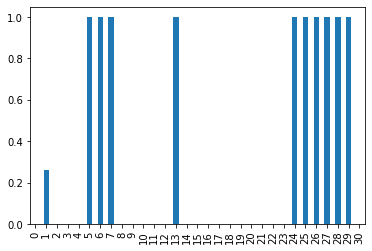

In [216]:


df=pd.DataFrame(tX0)
missing_series=df.isnull().sum()/df.shape[0]
missing_series.plot(kind="bar")

In [217]:
tX0_dropped=np.delete(tX0,[5,6,7,13,24,25,26,27,28,29],axis=1)

In [218]:
tX0_dropped[:,1:2], median0=nan_to_median(tX0_dropped[:,1:2])

In [219]:
labels_dropped0=y[tX0_dropped[:,0].astype(int)]
tX0_label0=tX0_dropped[labels_dropped0==-1]
tX0_label1=tX0_dropped[labels_dropped0==1]
print(len(tX0_label0))
print(len(tX0_label1))

74421
25492


In [220]:
np.random.seed(1)
np.random.shuffle(tX0_label0)
np.random.shuffle(tX0_label1)
tX0_label0=tX0_label0[:len(tX0_label1)]
tX0_dropped=np.concatenate((tX0_label0,tX0_label1),axis=0)
np.random.shuffle(tX0_dropped)
print(len(tX0_label0))
print(len(tX0_label1))

25492
25492


//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


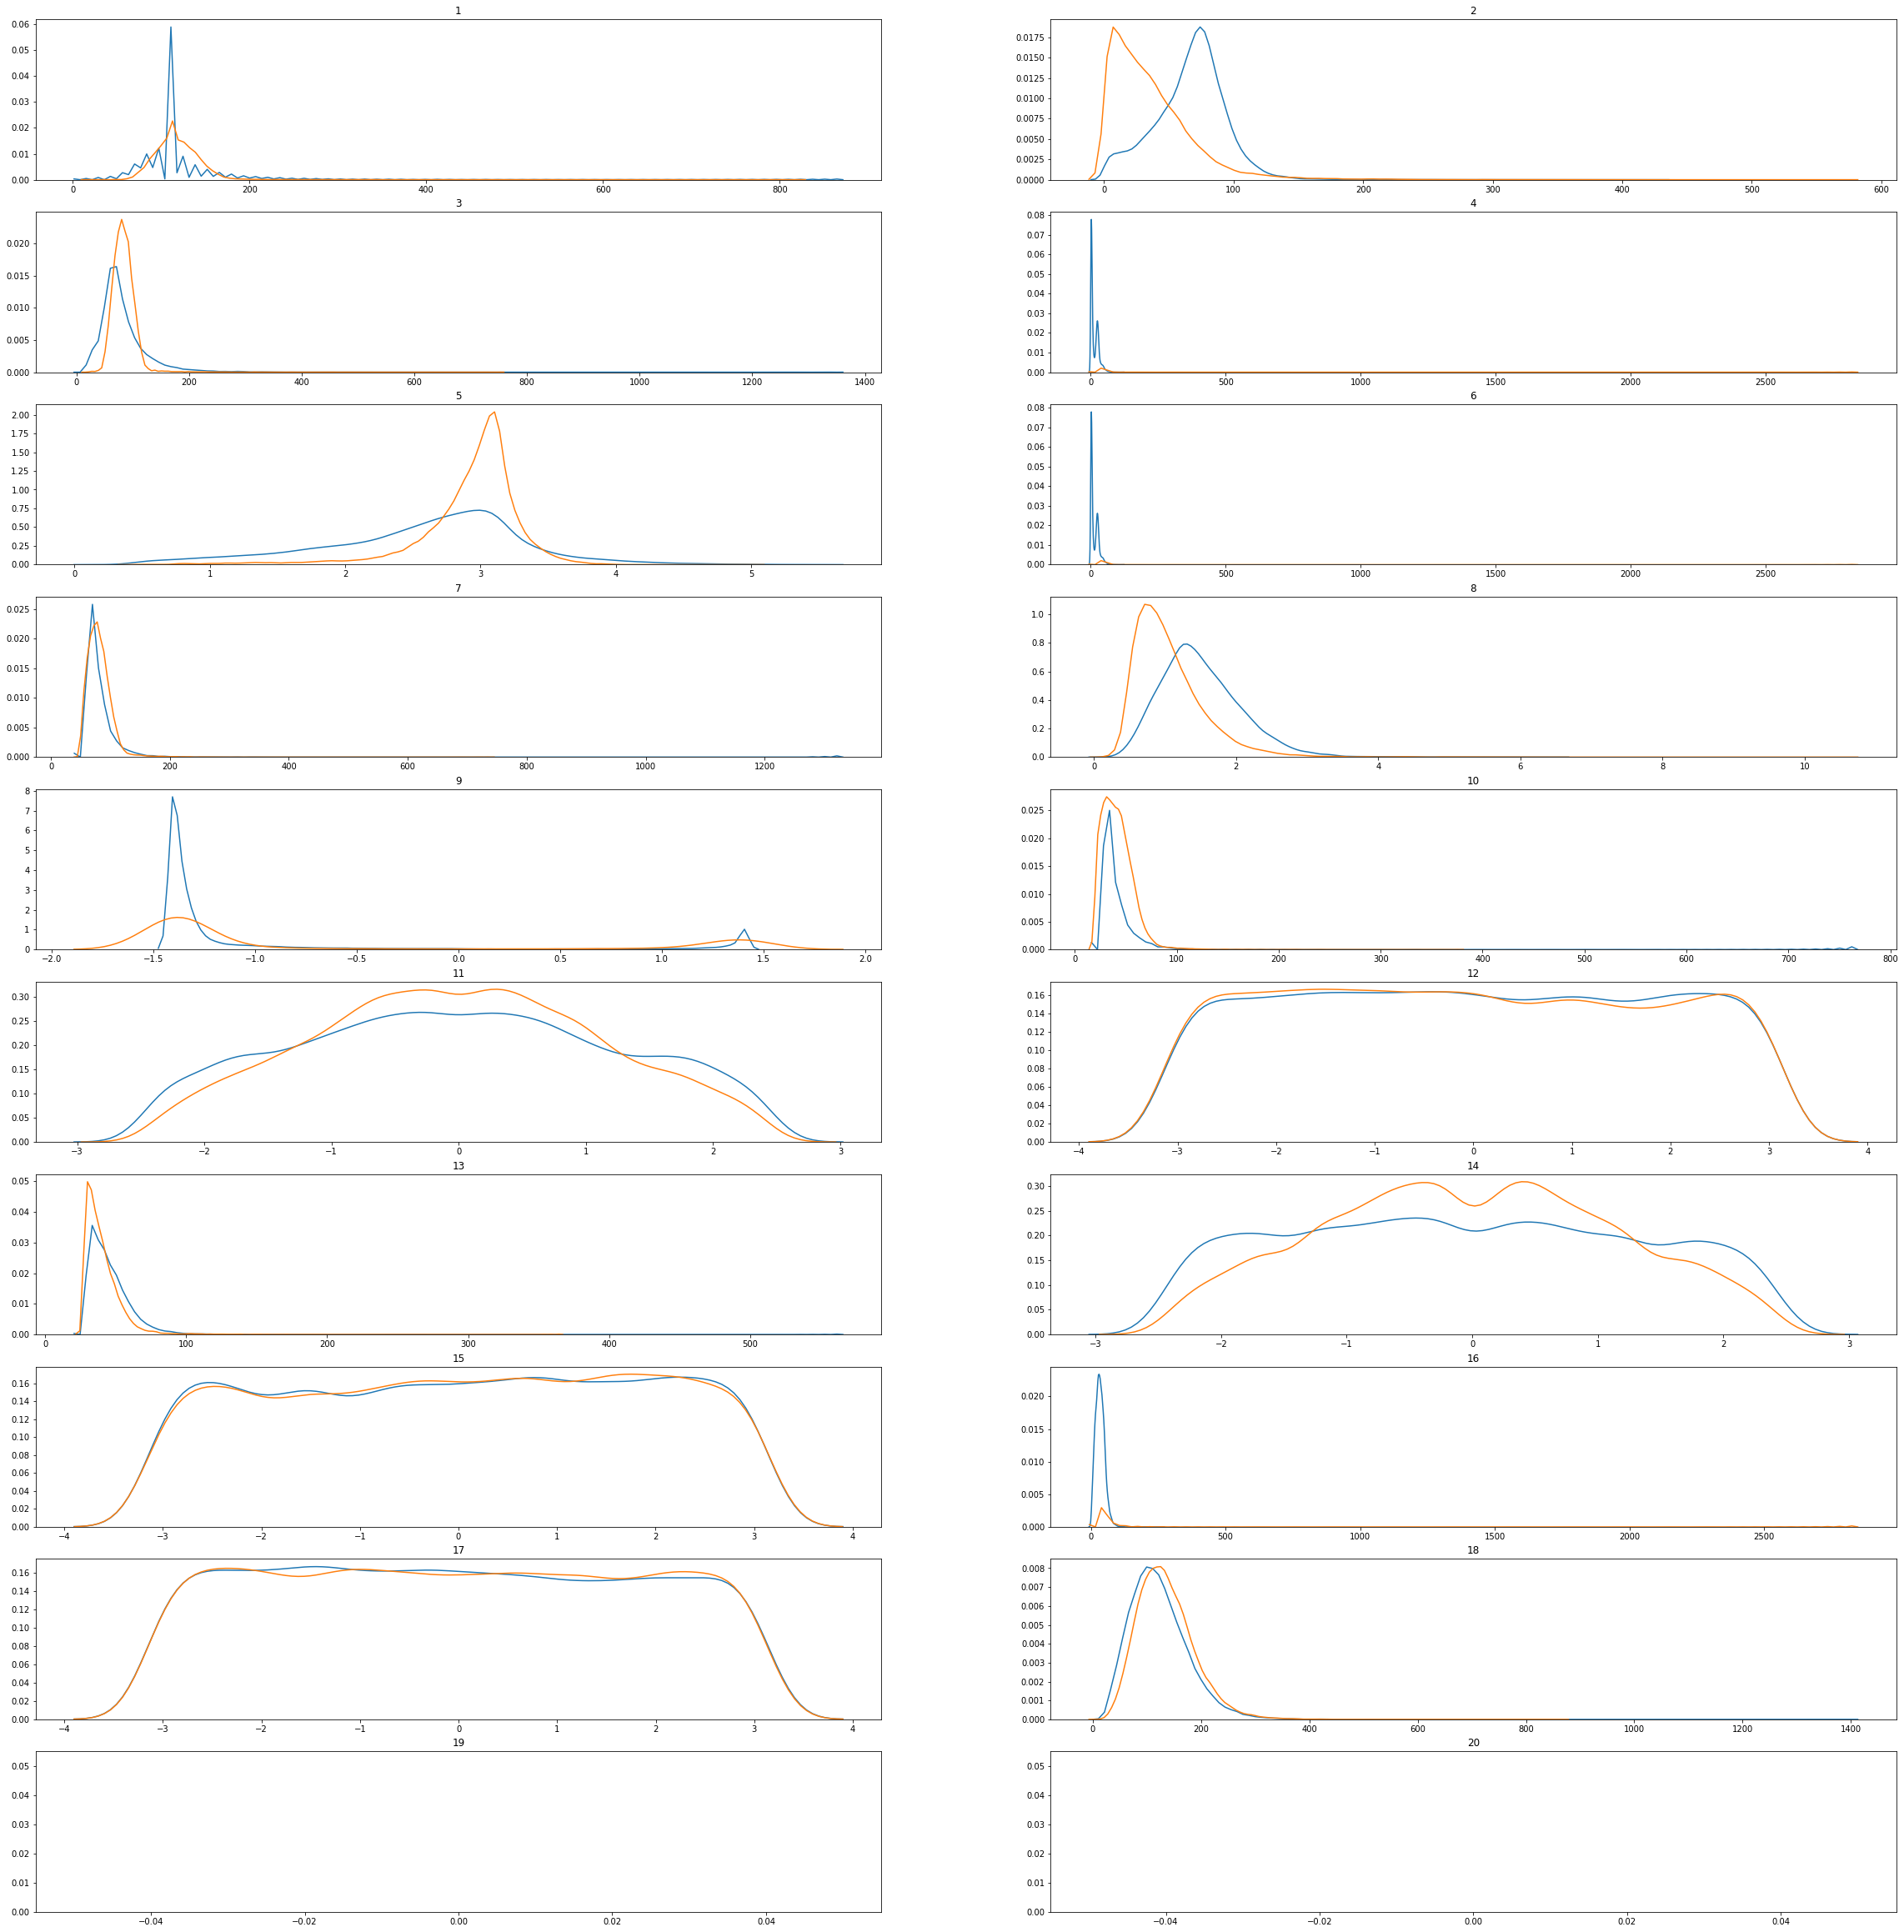

In [221]:
fig=plt.figure(figsize=(40,80))
for i in range(1,tX0_label0.shape[1]):
    plt.subplot(19,2,i)
    plt.title(i)
    sns.distplot(tX0_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX0_label1[:,i],ax=plt.gca(),hist=False)

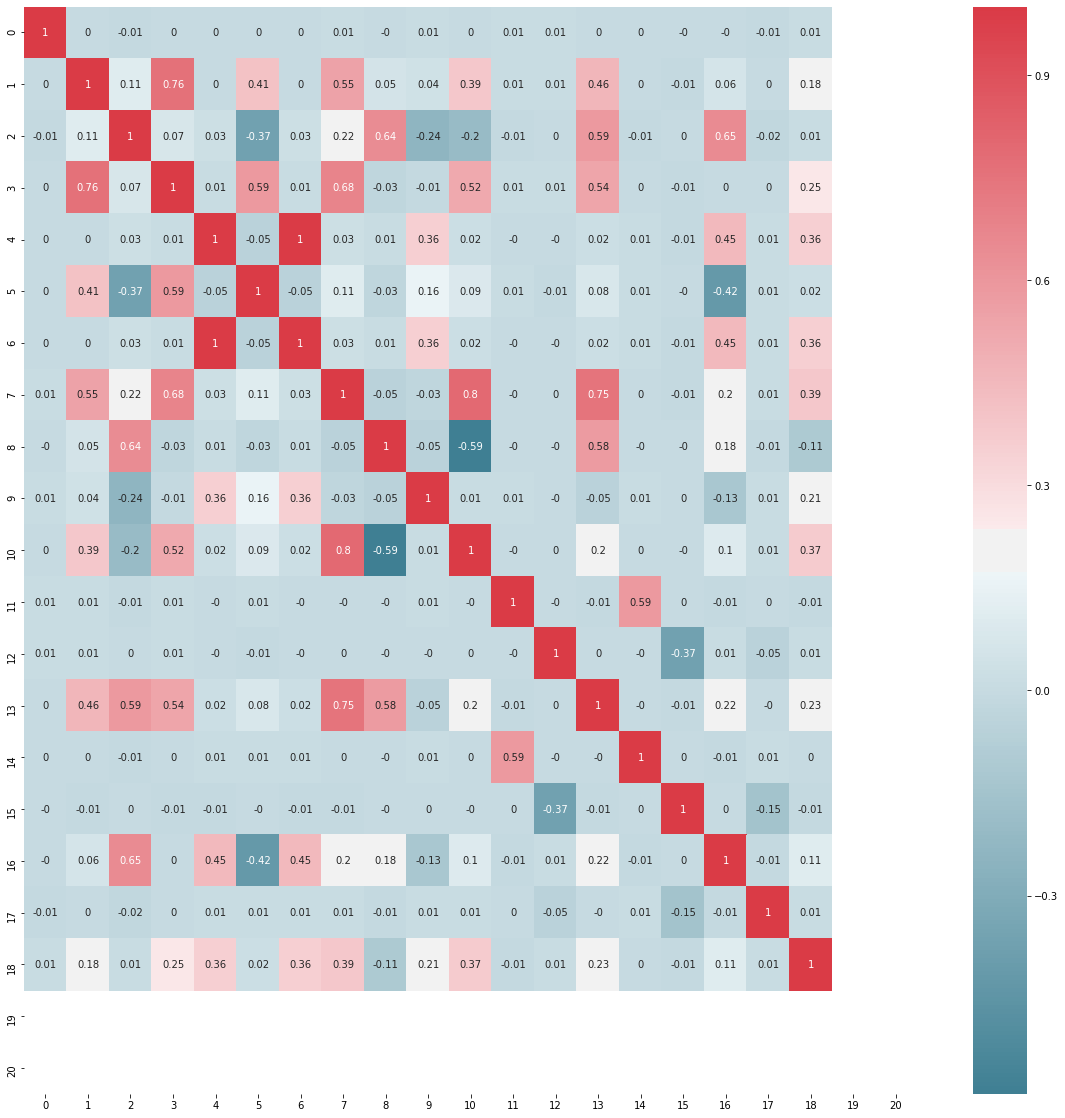

In [222]:
data=pd.DataFrame(tX0_dropped)
correlation_matrix=data.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(data=correlation_matrix.round(2),cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)

In [223]:
tX0_dropped_distribution=np.delete(tX0_dropped,[3,4,7,13,19,20],axis=1)

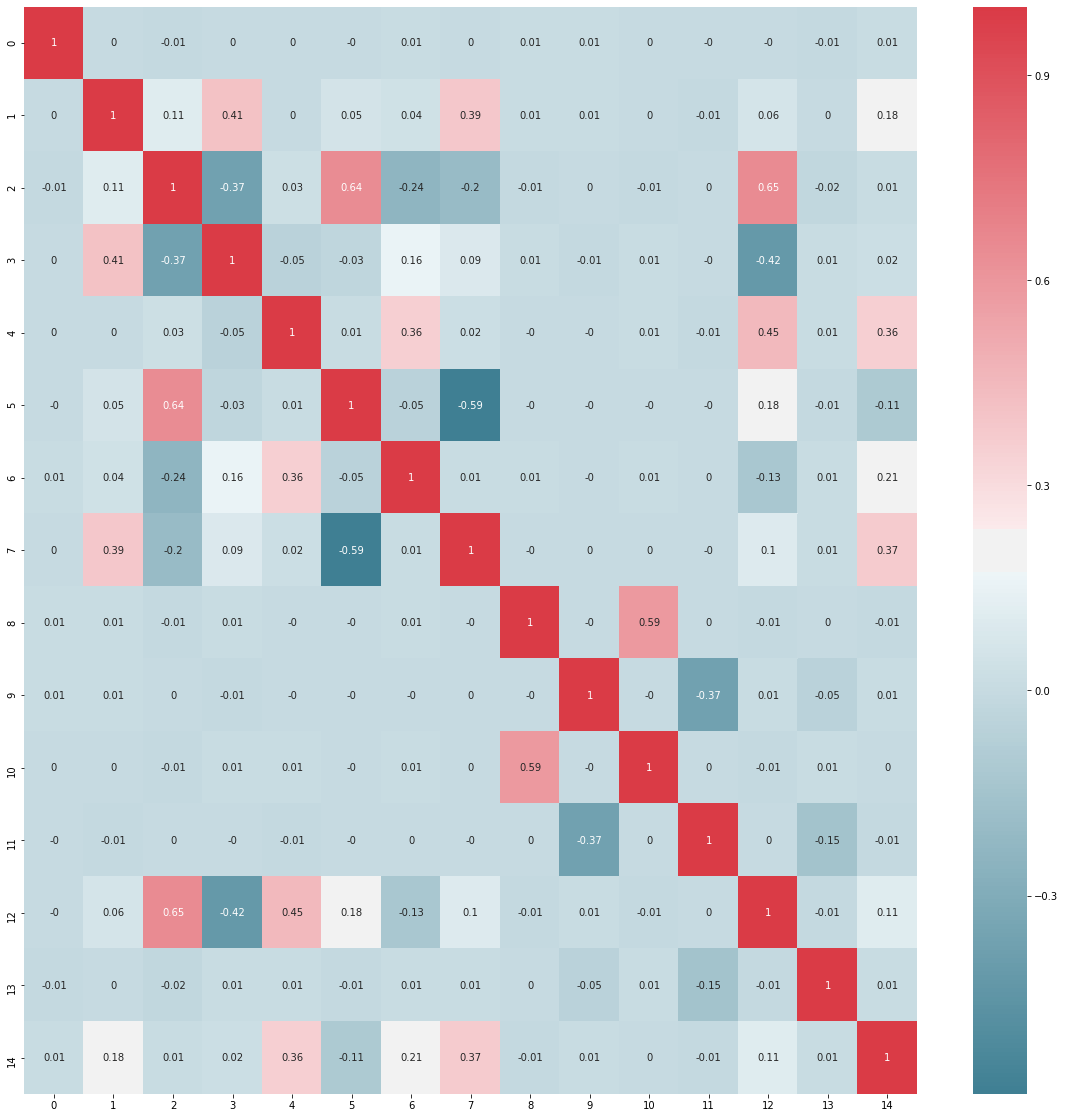

In [224]:
data=pd.DataFrame(tX0_dropped_distribution)
correlation_matrix=data.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(data=correlation_matrix.round(2),cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)

In [225]:
min0=np.min(tX0_dropped_distribution[:,1:],axis=0)
max0=np.max(tX0_dropped_distribution[:,1:],axis=0)
tX0_dropped_distribution[:,1:]=min_max_transform(tX0_dropped_distribution[:,1:],min0,max0)

In [226]:
index_to_be_skewed0=[2,7,14]

In [227]:
tX0_skew_mins=np.apply_along_axis(np.min,0,tX0_dropped_distribution)
tX0_dropped_distribution[:,index_to_be_skewed0]= tX0_dropped_distribution[:,index_to_be_skewed0]+np.abs(tX0_skew_mins[index_to_be_skewed0])
tX0_dropped_distribution[:,index_to_be_skewed0]= np.log(tX0_dropped_distribution[:,index_to_be_skewed0]+1)

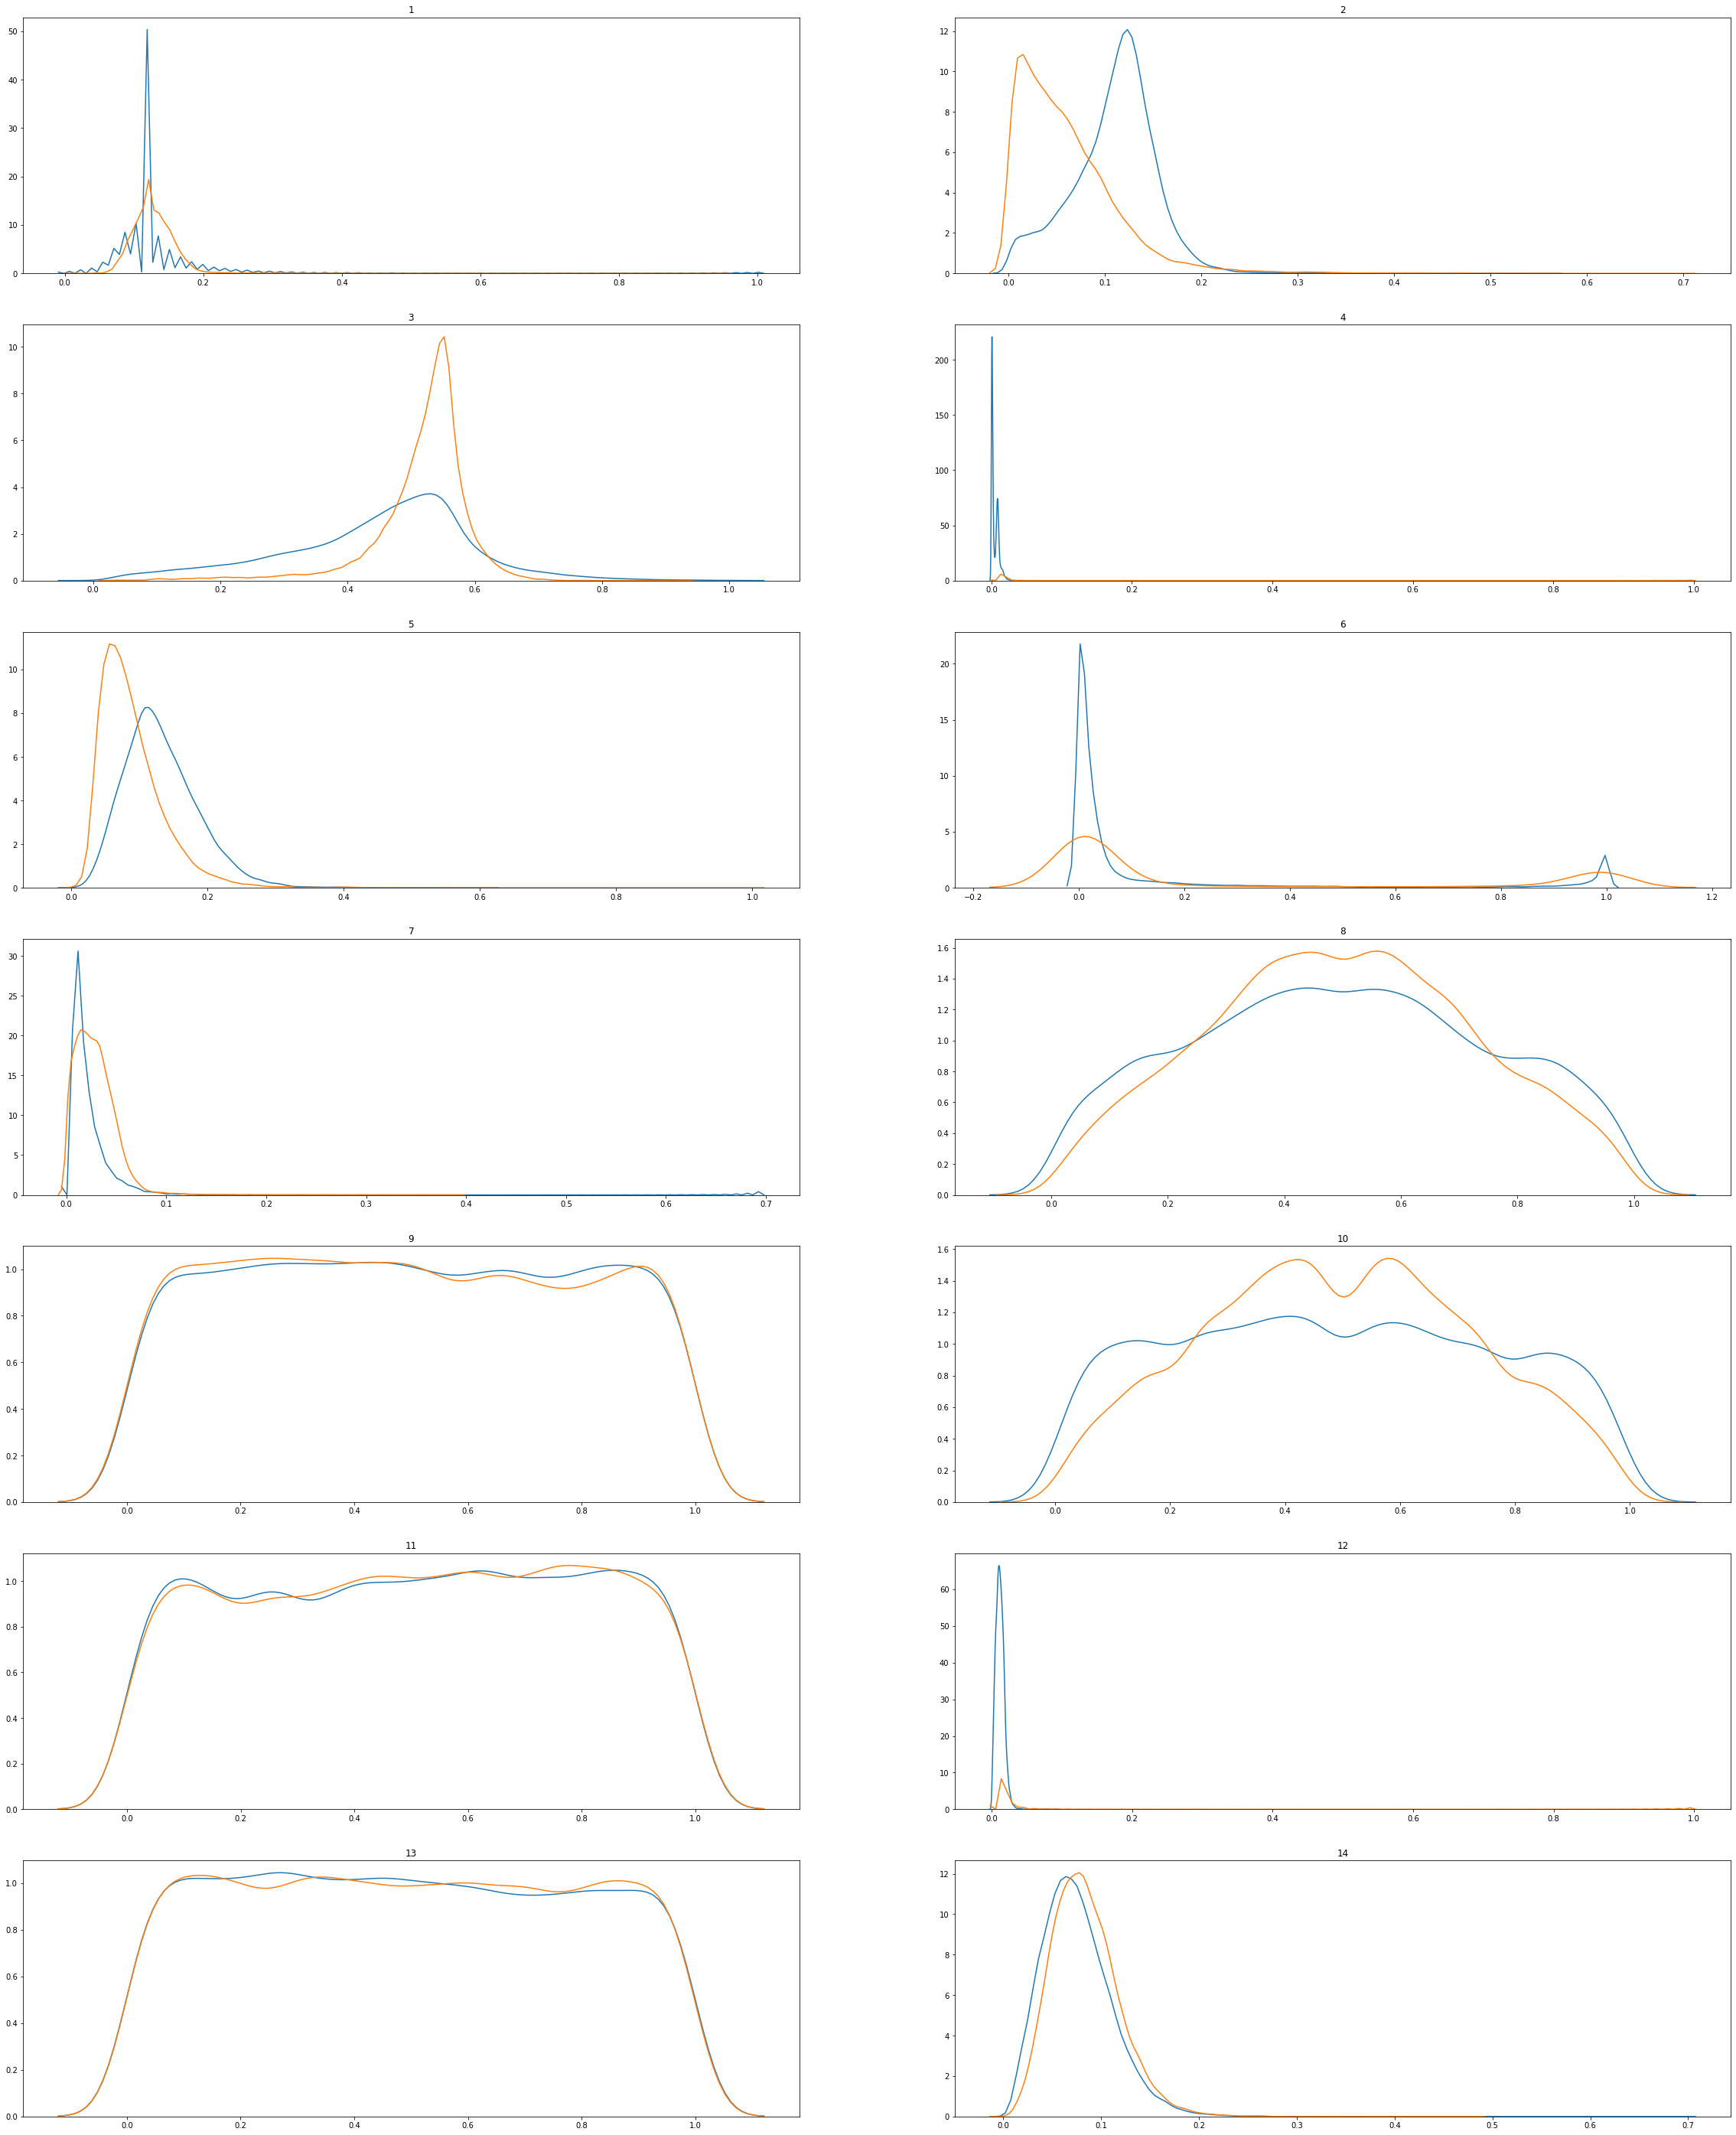

In [228]:
labels_dropped0=y[tX0_dropped_distribution[:,0].astype(int)]
tX0_label0=tX0_dropped_distribution[labels_dropped0==-1]
tX0_label1=tX0_dropped_distribution[labels_dropped0==1]

fig1=plt.figure(figsize=(40,80))
for i in range(1,tX0_label0.shape[1]):
    plt.subplot(11,2,i)
    plt.title(i)
    sns.distplot(tX0_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX0_label1[:,i],ax=plt.gca(),hist=False)

# Tx1 analysis

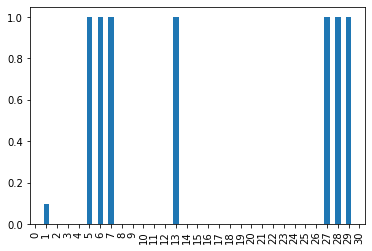

In [229]:
df=pd.DataFrame(tX1)
missing_series=df.isnull().sum()/df.shape[0]
missing_series.plot(kind="bar")

In [230]:
tX1_dropped=np.delete(tX1,[5,6,7,13,27,28,29],axis=1)

In [231]:
tX1_dropped[:,1:2], median1=nan_to_median(tX1_dropped[:,1:2])

In [232]:
labels_dropped1=y[tX1_dropped[:,0].astype(int)]
tX1_label0=tX1_dropped[labels_dropped1==-1]
tX1_label1=tX1_dropped[labels_dropped1==1]
print(len(tX1_label0))
print(len(tX1_label1))

49834
27710


In [233]:
np.random.seed(1)
np.random.shuffle(tX1_label0)
np.random.shuffle(tX1_label1)
tX1_label0=tX1_label0[:len(tX1_label1)]
tX1_dropped=np.concatenate((tX1_label0,tX1_label1),axis=0)
np.random.shuffle(tX1_dropped)
print(len(tX1_label0))
print(len(tX1_label1))

27710
27710


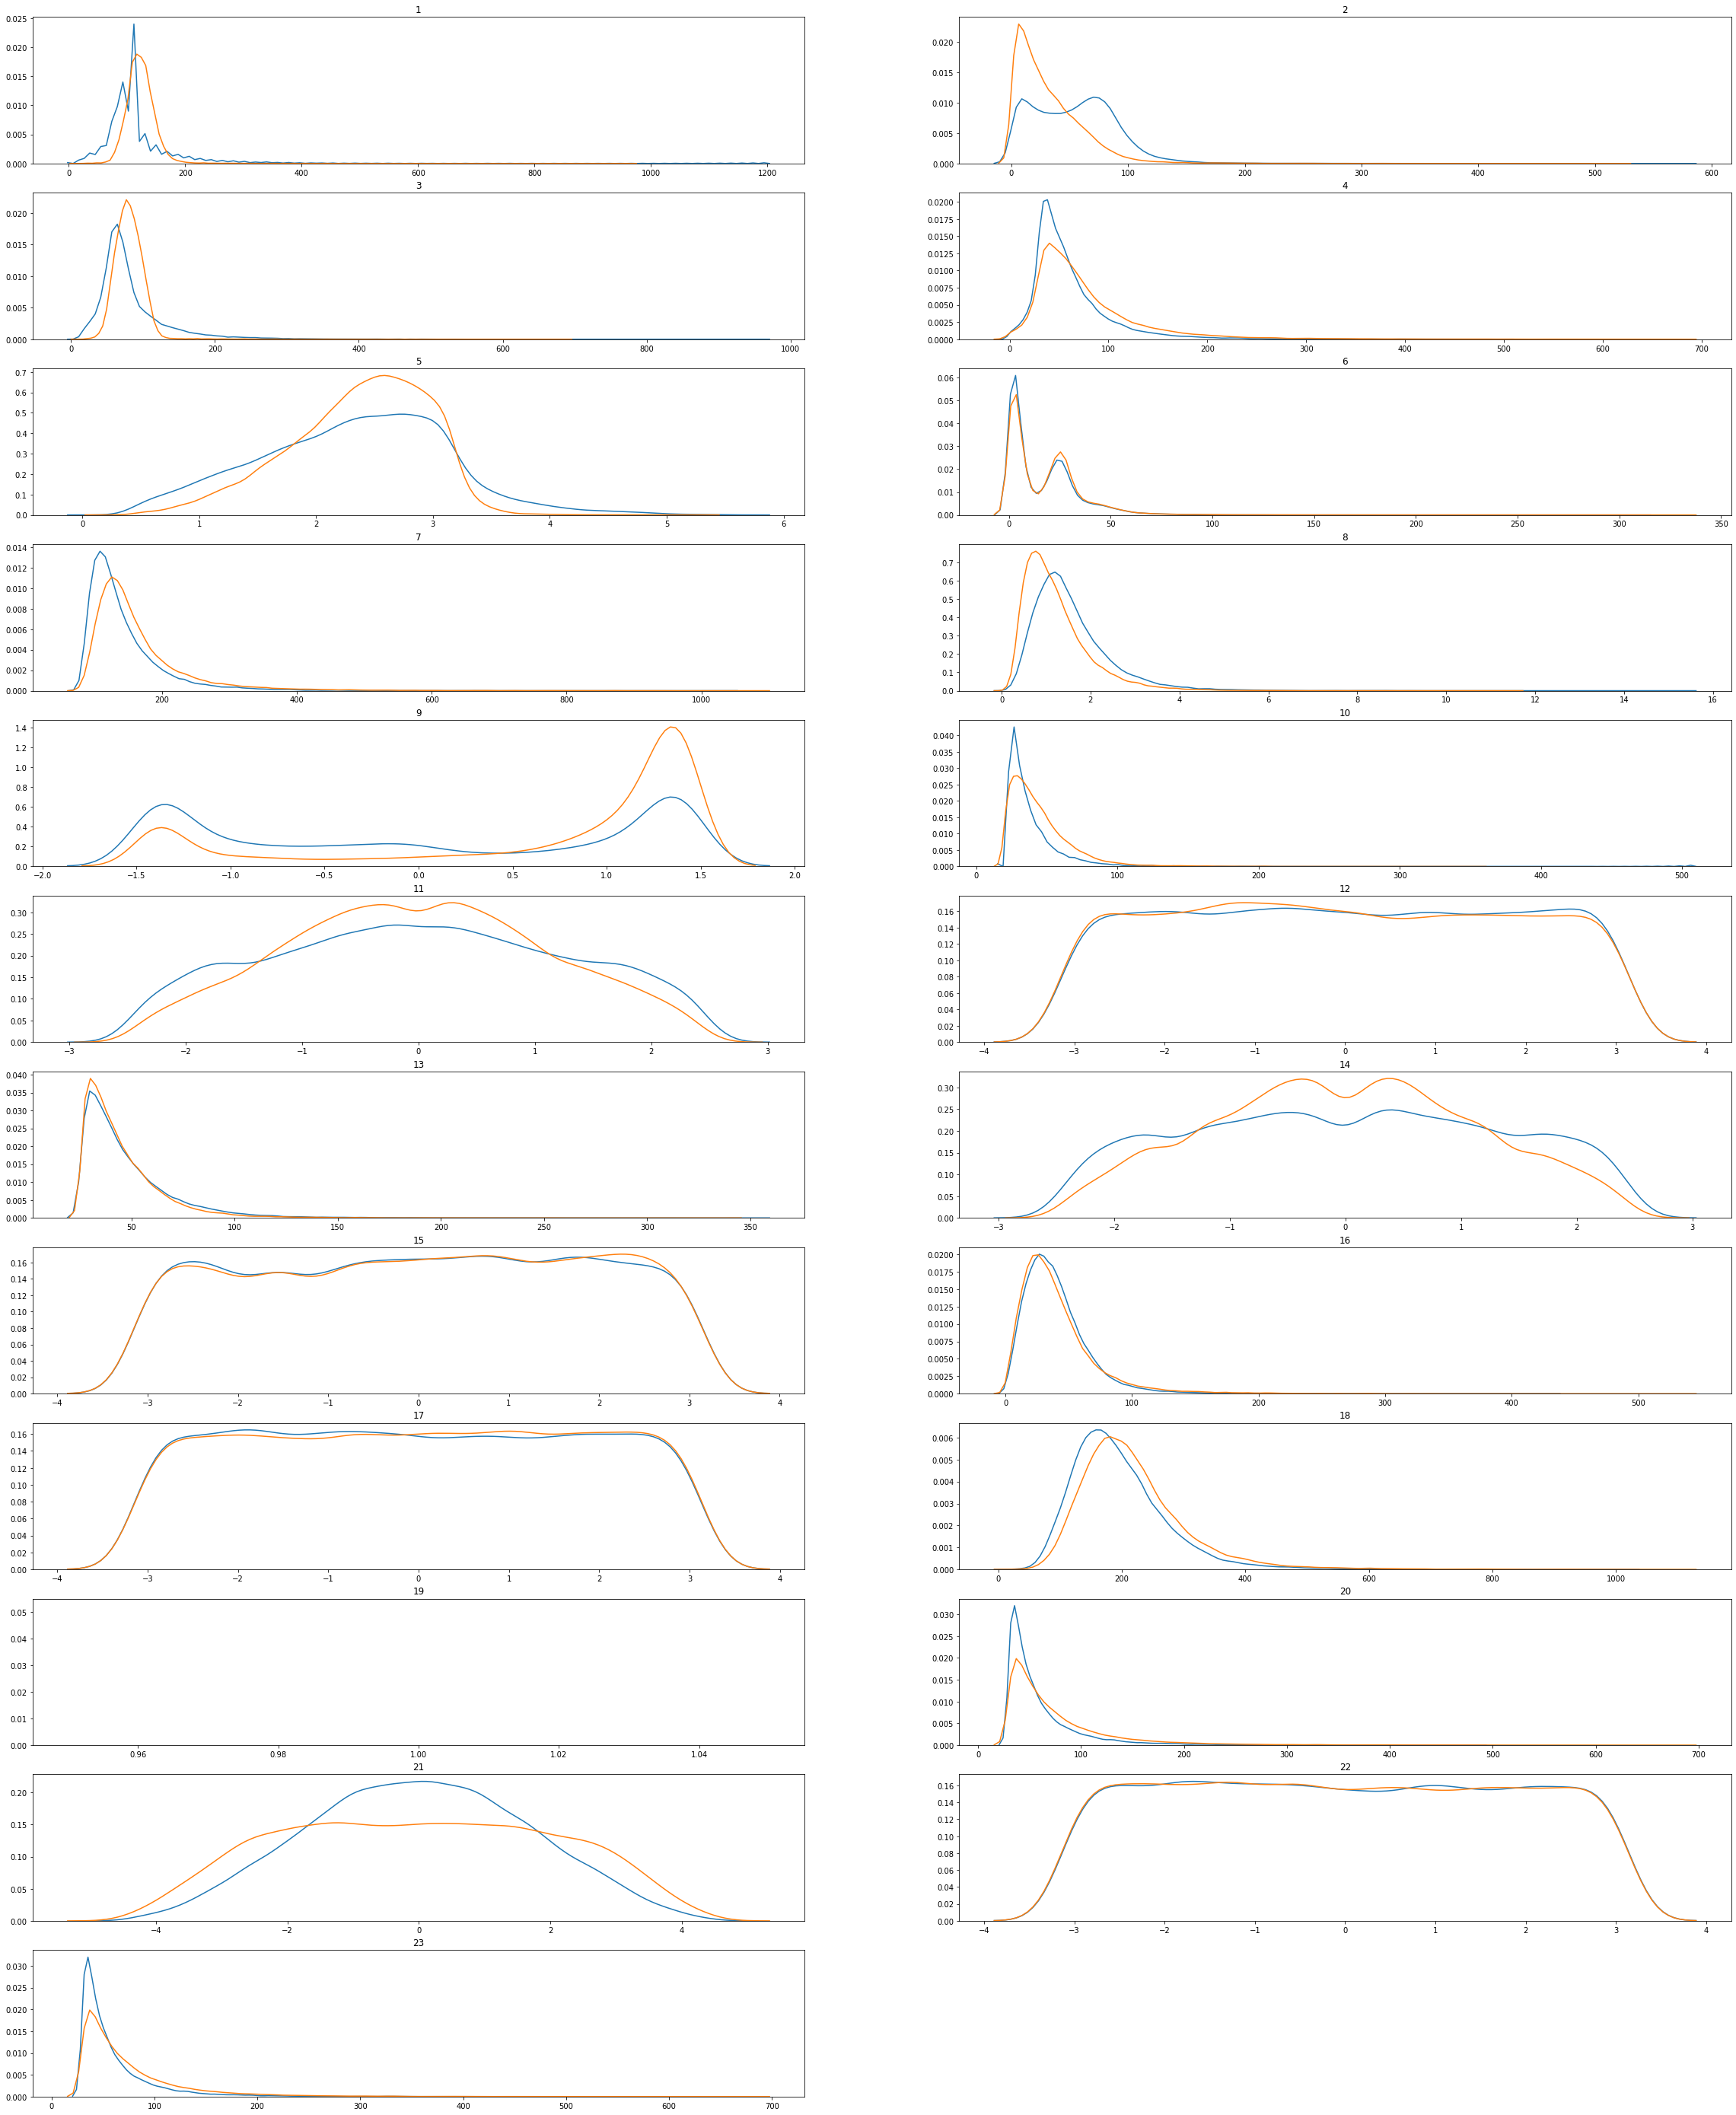

In [234]:
labels_dropped1=y[tX1_dropped[:,0].astype(int)]
tX1_label0=tX1_dropped[labels_dropped1==-1]
tX1_label1=tX1_dropped[labels_dropped1==1]
fig=plt.figure(figsize=(40,80))
for i in range(1,tX1_label0.shape[1]):
    plt.subplot(19,2,i)
    plt.title(i)
    sns.distplot(tX1_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX1_label1[:,i],ax=plt.gca(),hist=False)

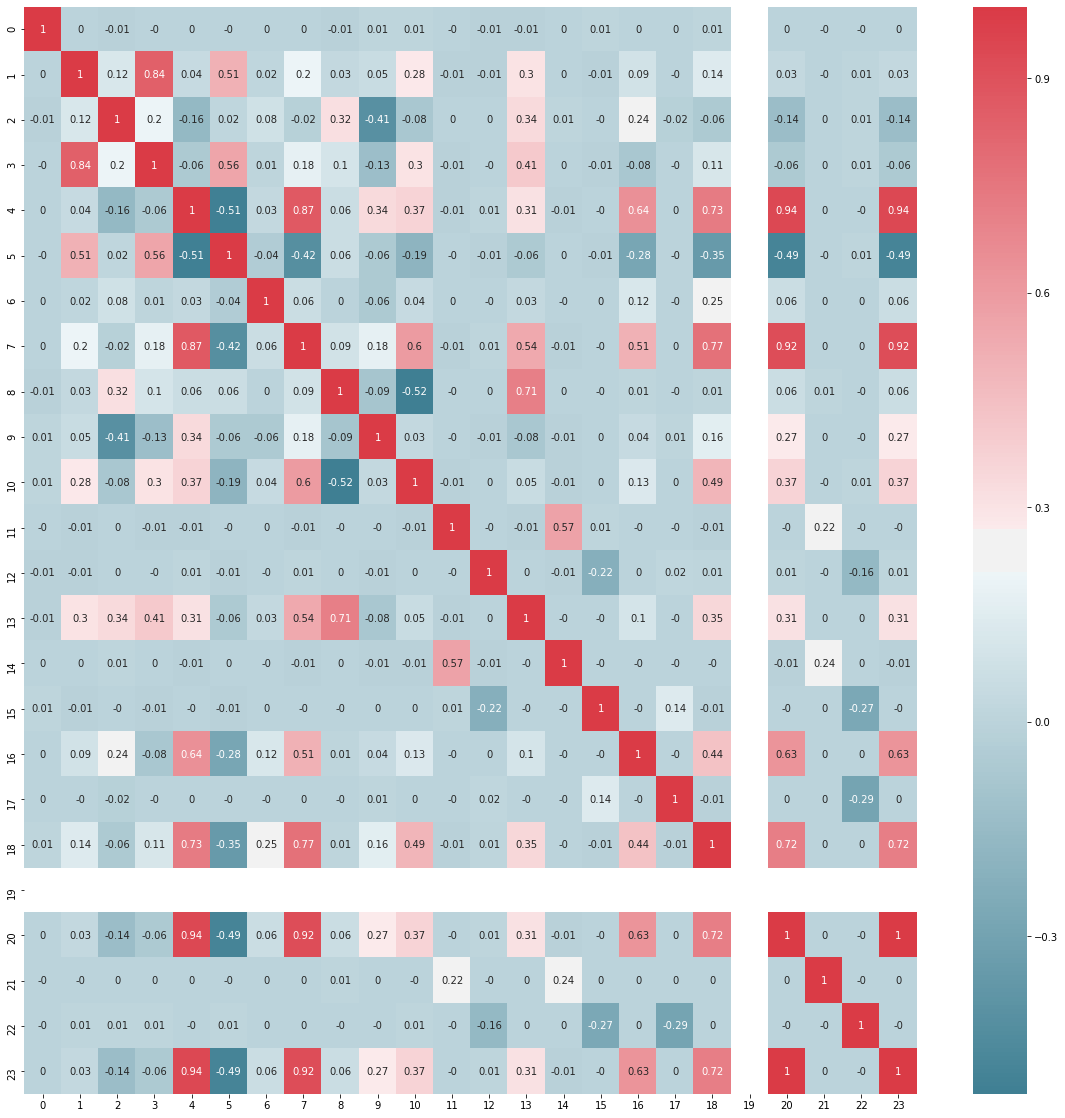

In [235]:
data=pd.DataFrame(tX1_dropped)
correlation_matrix=data.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(data=correlation_matrix.round(2),cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)

In [236]:
tX1_dropped_distribution=np.delete(tX1_dropped,[4,7,19,20],axis=1)

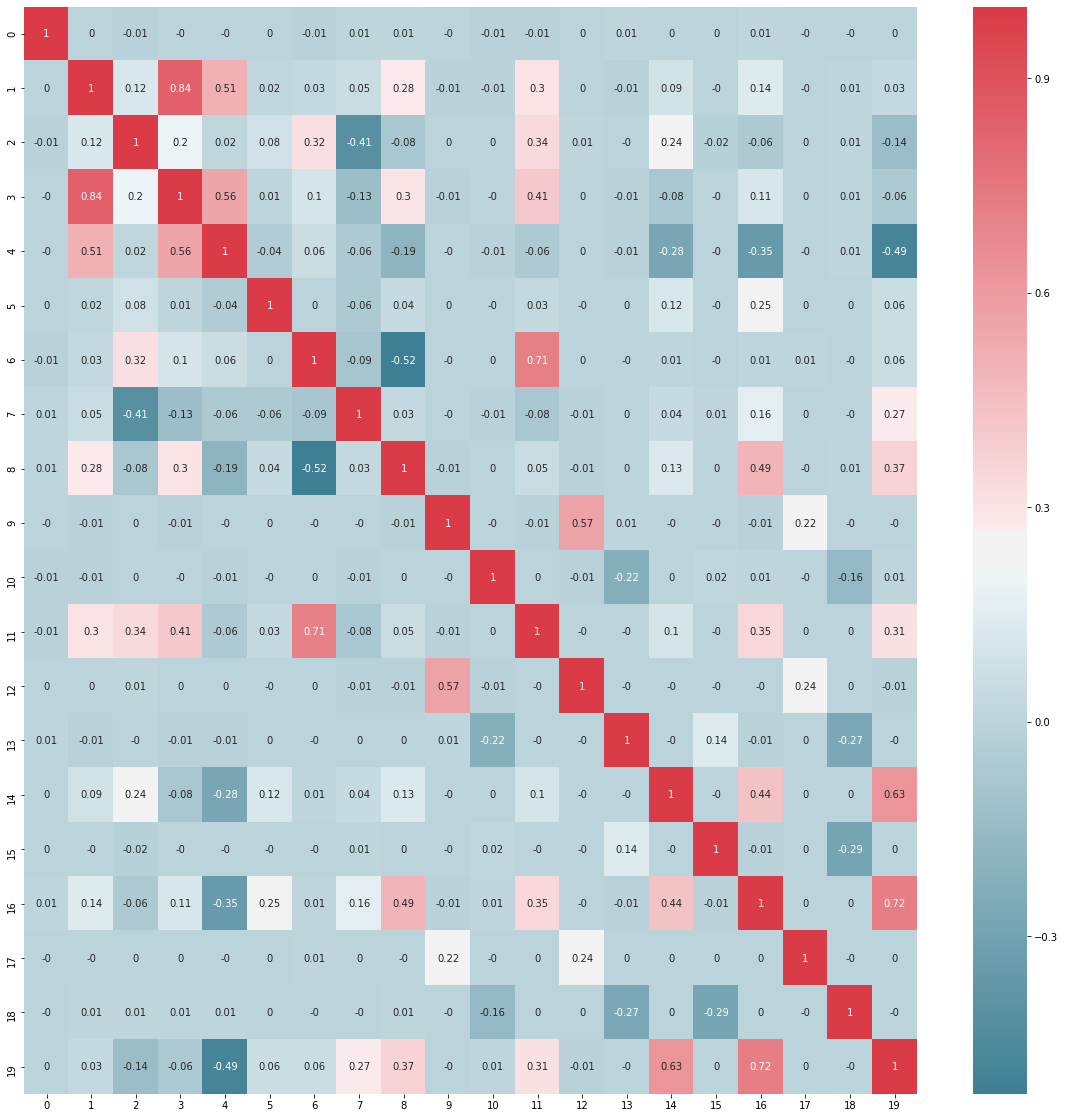

In [237]:
data=pd.DataFrame(tX1_dropped_distribution)
correlation_matrix=data.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(data=correlation_matrix.round(2),cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)

In [238]:
np.random.seed(1)
np.random.shuffle(tX1_dropped_distribution)

In [239]:
min1=np.min(tX1_dropped_distribution[:,1:],axis=0)
max1=np.max(tX1_dropped_distribution[:,1:],axis=0)
tX1_dropped_distribution[:,1:]=min_max_transform(tX1_dropped_distribution[:,1:],min1,max1)

In [240]:
index_to_be_skewed1=[2,4,8,11]

tX1_skew_mins=np.apply_along_axis(np.min,0,tX1_dropped_distribution)
tX1_dropped_distribution[:,index_to_be_skewed1]= tX1_dropped_distribution[:,index_to_be_skewed1]+np.abs(tX1_skew_mins[index_to_be_skewed1])
tX1_dropped_distribution[:,index_to_be_skewed1]= np.log(tX1_dropped_distribution[:,index_to_be_skewed1]+1)

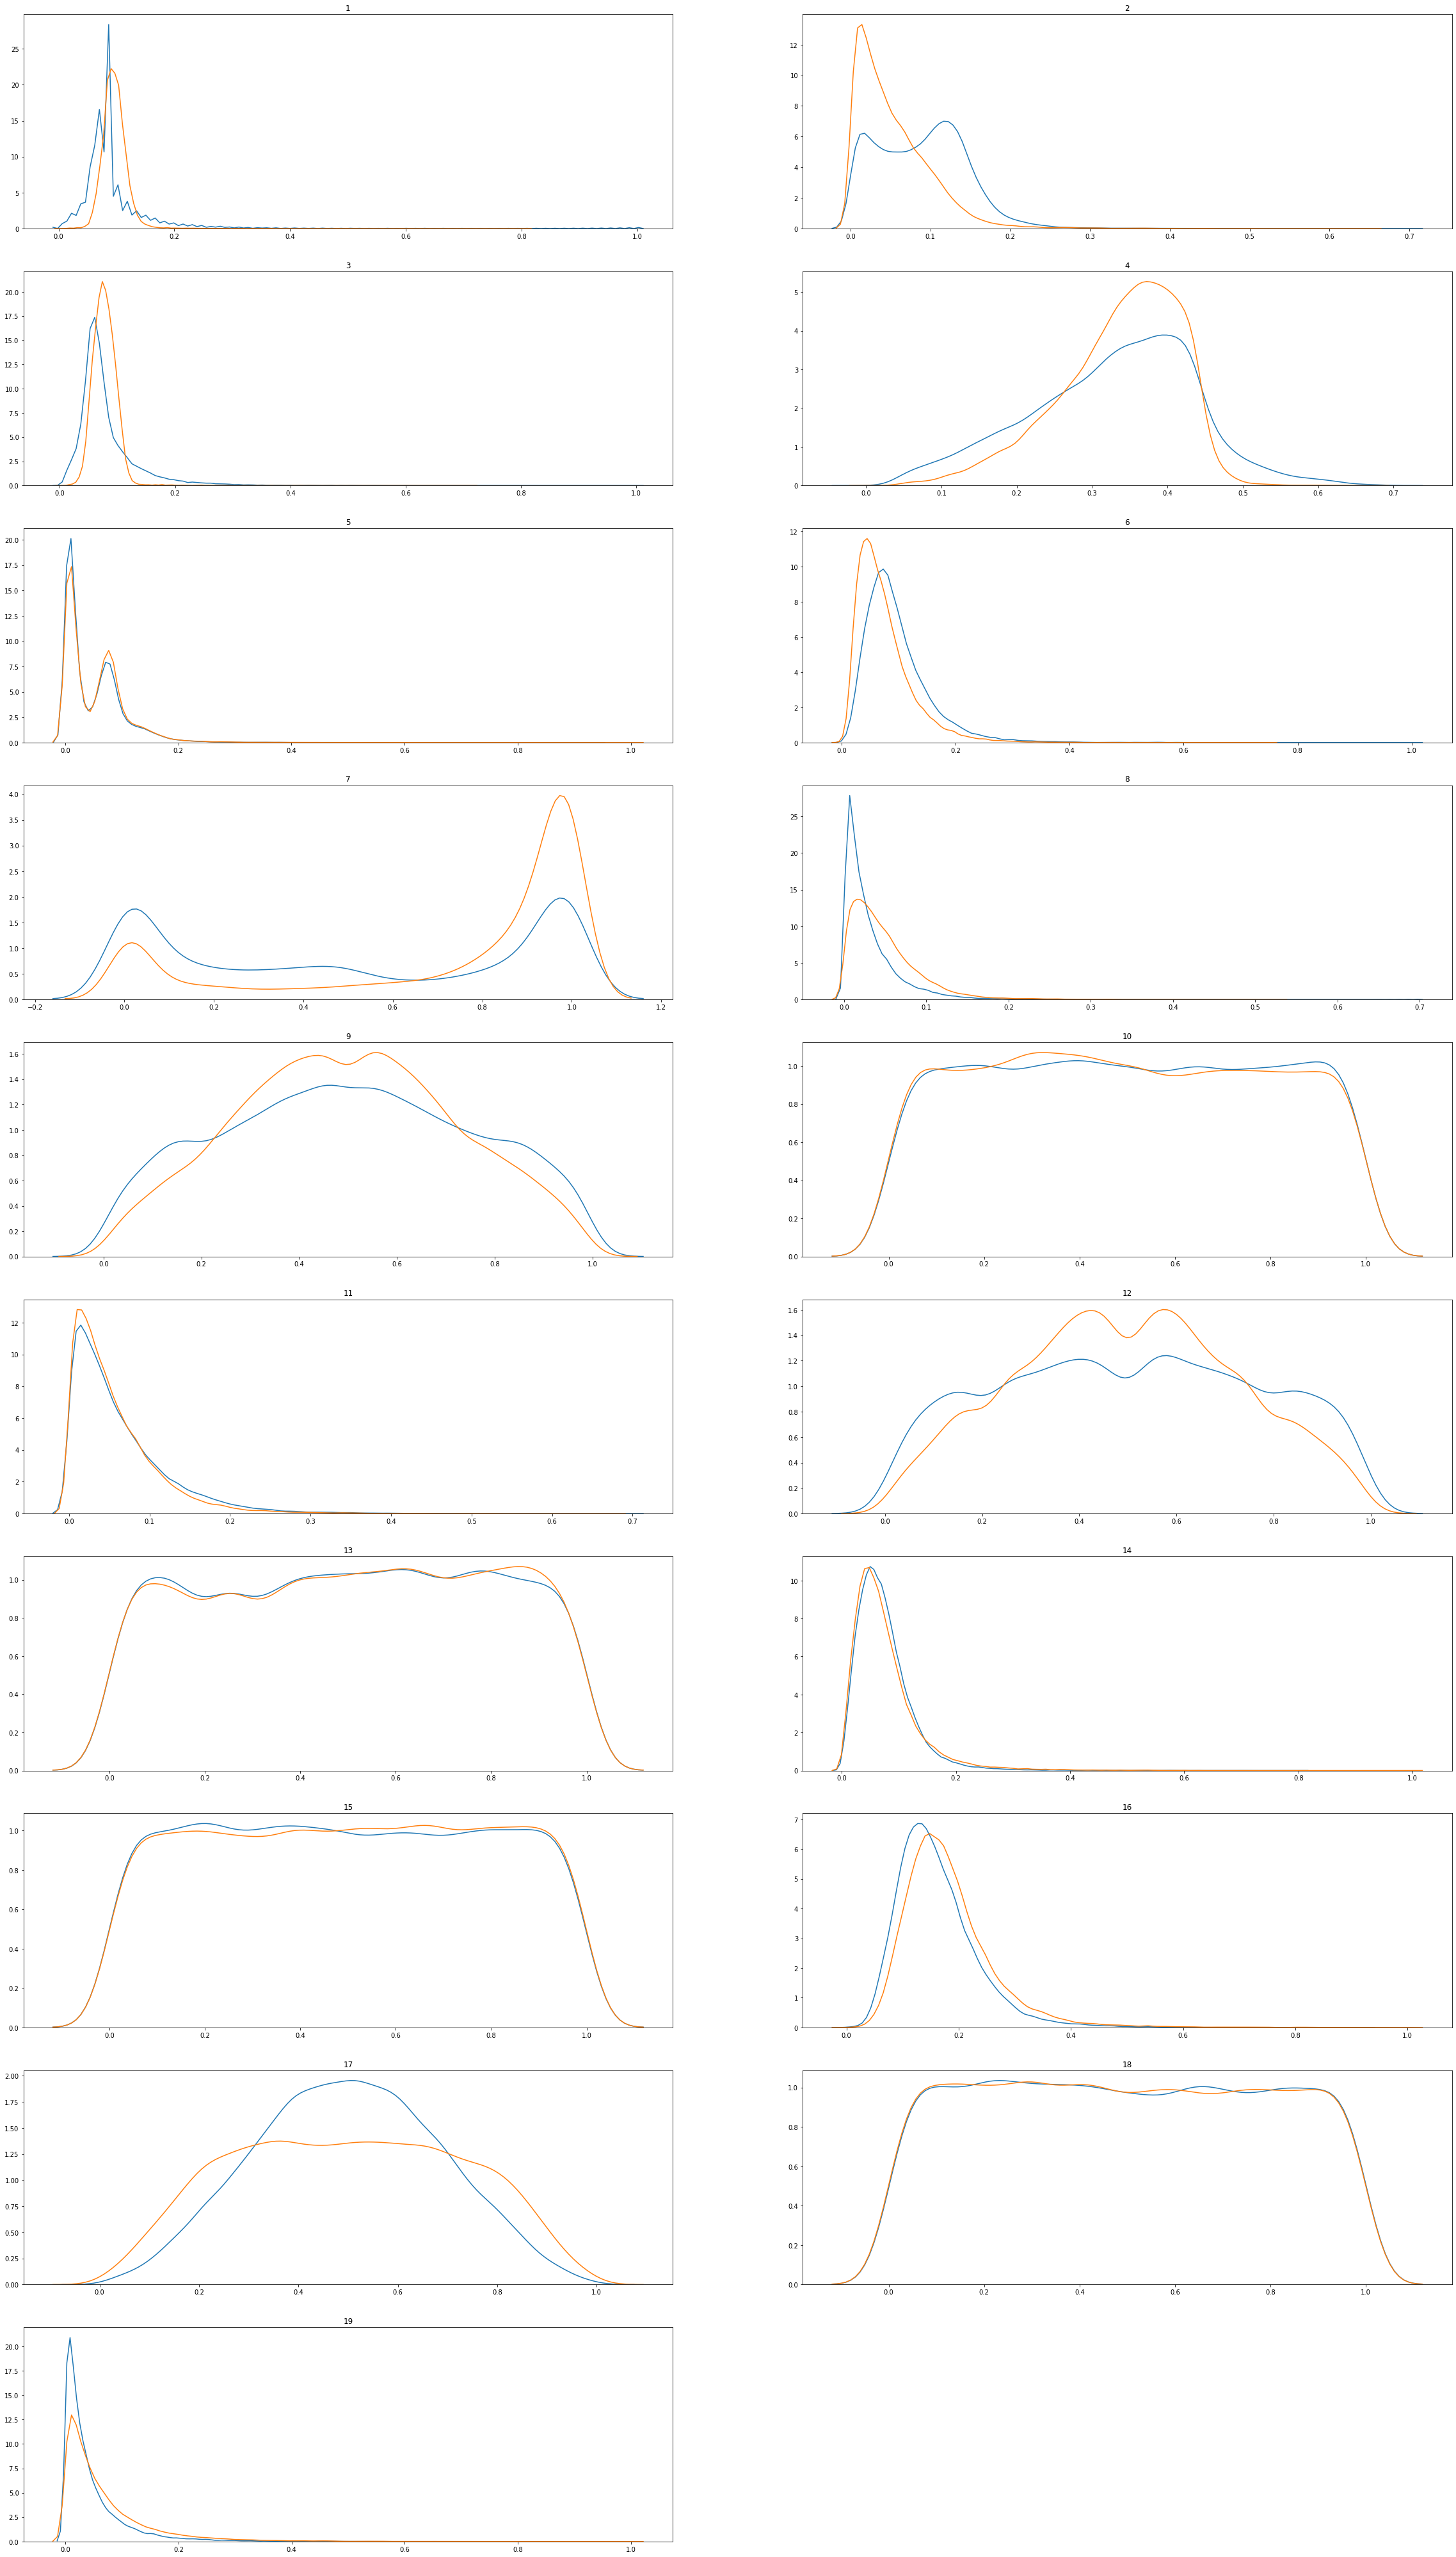

In [241]:
labels_dropped1=y[tX1_dropped_distribution[:,0].astype(int)]
tX1_label0=tX1_dropped_distribution[labels_dropped1==-1]
tX1_label1=tX1_dropped_distribution[labels_dropped1==1]

fig1=plt.figure(figsize=(40,80))
for i in range(1,tX1_label0.shape[1]):
    plt.subplot(11,2,i)
    plt.title(i)
    sns.distplot(tX1_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX1_label1[:,i],ax=plt.gca(),hist=False)

# Tx2 analysis

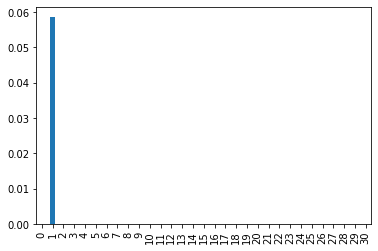

In [242]:
df=pd.DataFrame(tX2)
missing_series=df.isnull().sum()/df.shape[0]
missing_series.plot(kind="bar")

In [243]:
tX2[:,1:2], median2=nan_to_median(tX2[:,1:2])

In [244]:
labels_dropped0=y[tX2[:,0].astype(int)]
tX2_label0=tX2[labels_dropped0==-1]
tX2_label1=tX2[labels_dropped0==1]
print(len(tX2_label0))
print(len(tX2_label1))

24645
25734


In [245]:
np.random.seed(1)
np.random.shuffle(tX2_label0)
np.random.shuffle(tX2_label1)
tX2_label1=tX2_label1[:len(tX2_label0)]
tX2_dropped=np.concatenate((tX2_label0,tX2_label1),axis=0)
np.random.shuffle(tX2_dropped)
print(len(tX2_label0))
print(len(tX2_label1))

24645
24645


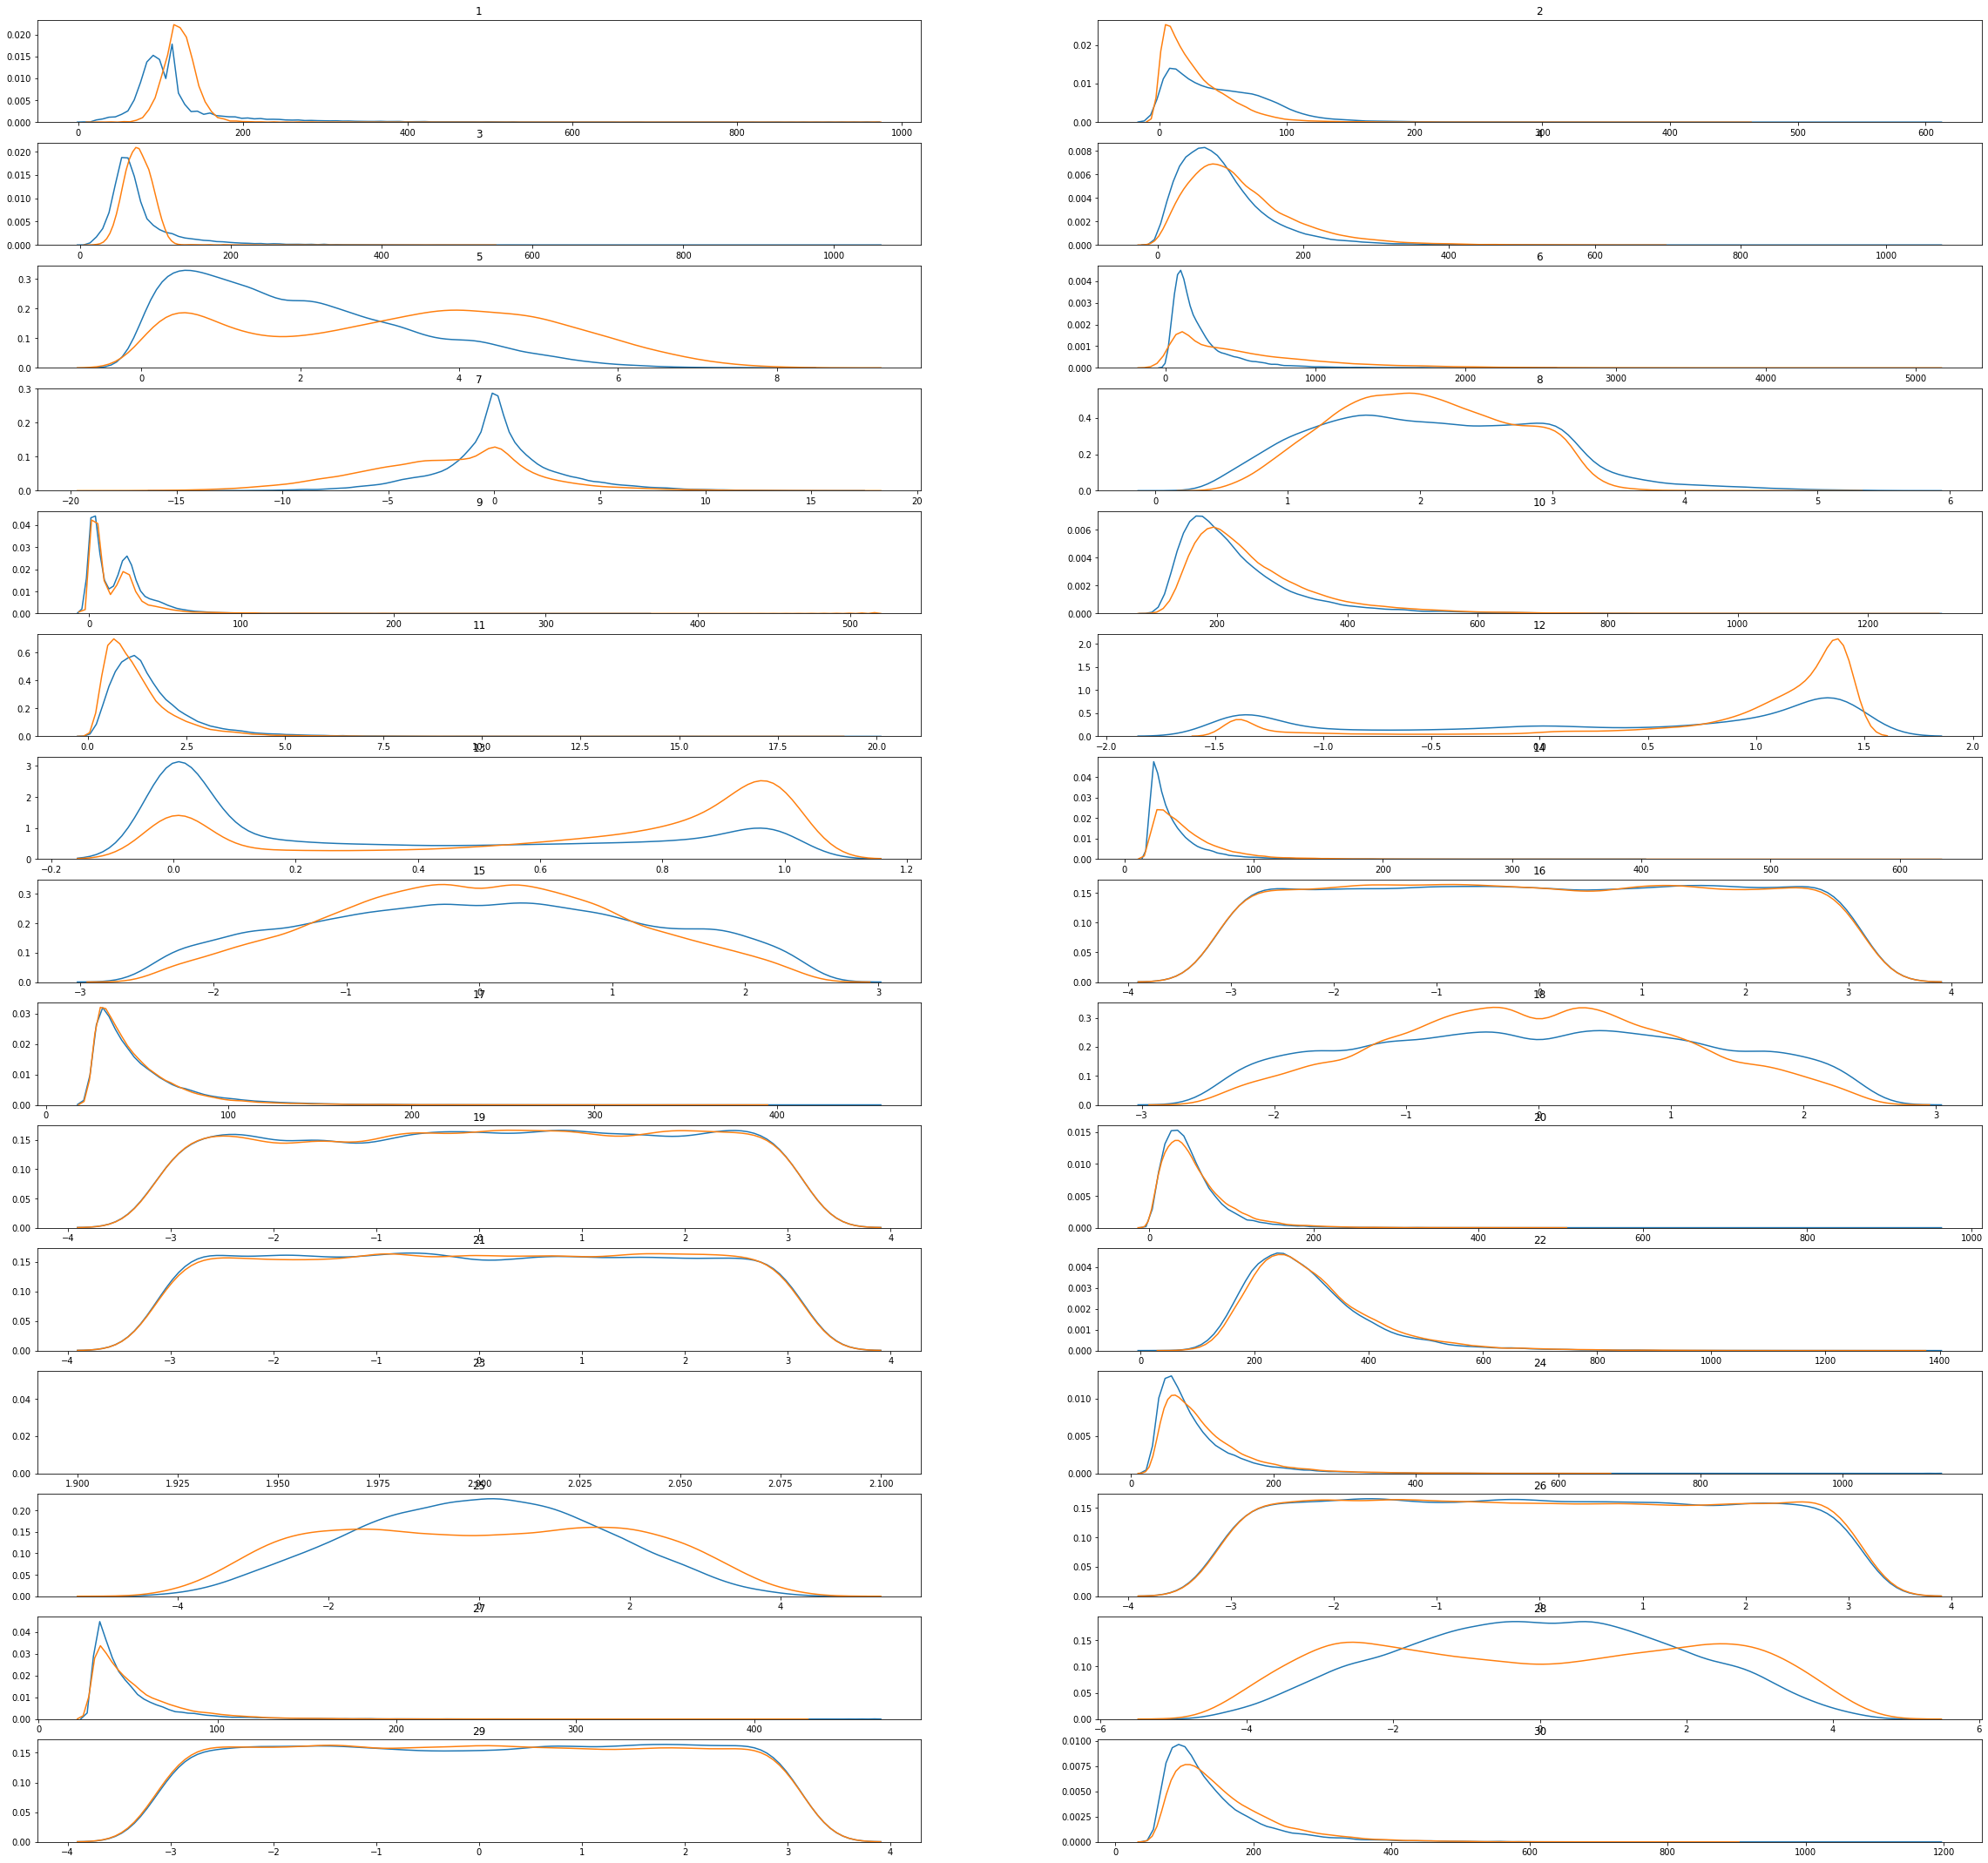

In [246]:
labels_dropped2=y[tX2_dropped[:,0].astype(int)]
tX2_label0=tX2_dropped[labels_dropped2==-1]
tX2_label1=tX2_dropped[labels_dropped2==1]
fig=plt.figure(figsize=(40,80))
for i in range(1,tX2_label0.shape[1]):
    plt.subplot(31,2,i)
    plt.title(i)
    sns.distplot(tX2_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX2_label1[:,i],ax=plt.gca(),hist=False)

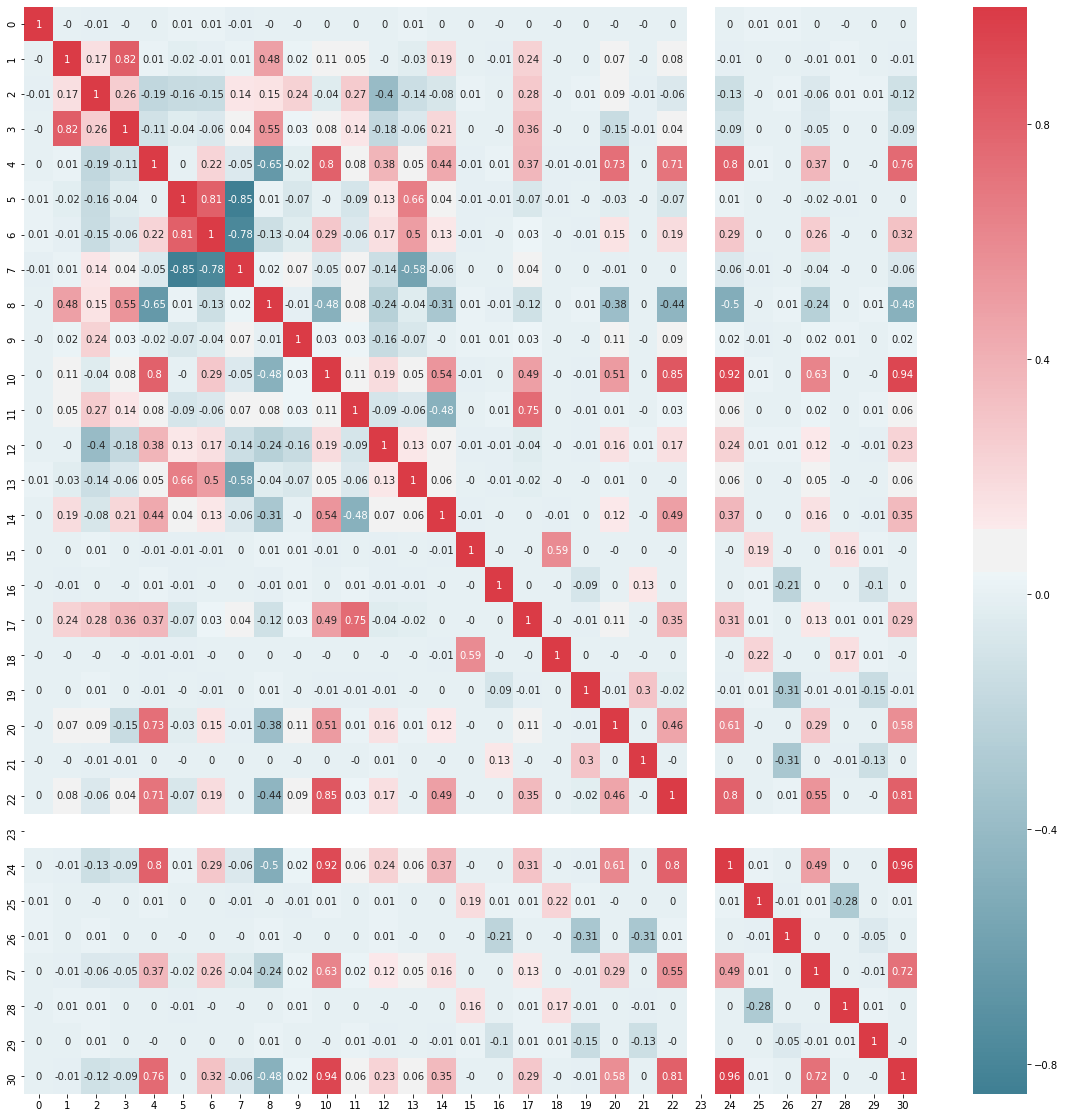

In [247]:
data=pd.DataFrame(tX2_dropped)
correlation_matrix=data.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(data=correlation_matrix.round(2),cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)

In [248]:
tX2_dropped_distribution=np.delete(tX2_dropped,[4,6,22,23,24,27,30],axis=1)

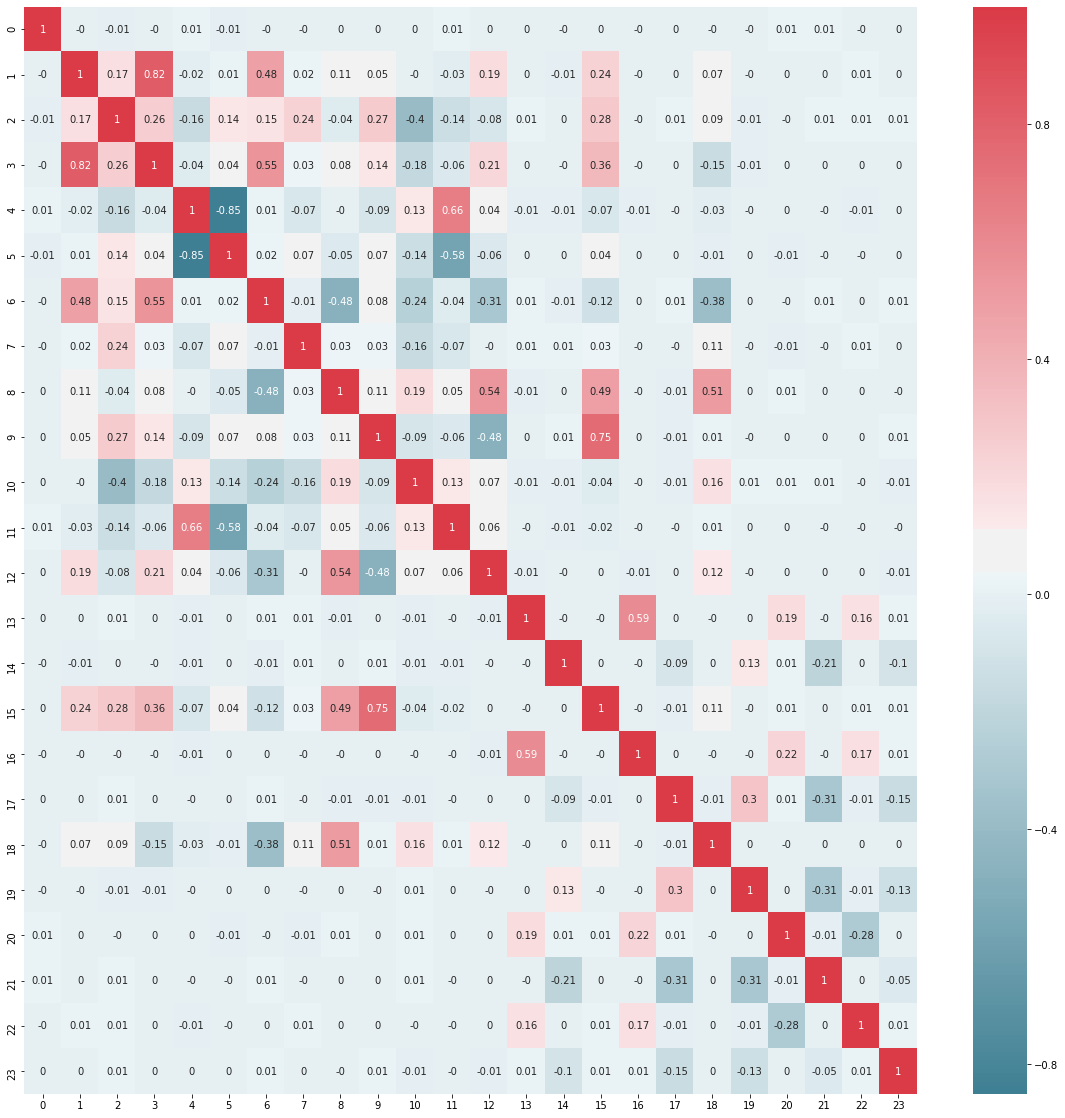

In [249]:
data=pd.DataFrame(tX2_dropped_distribution)
correlation_matrix=data.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(data=correlation_matrix.round(2),cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)

In [251]:
min2=np.min(tX2_dropped_distribution[:,1:],axis=0)
max2=np.max(tX2_dropped_distribution[:,1:],axis=0)
tX2_dropped_distribution[:,1:]=min_max_transform(tX2_dropped_distribution[:,1:],min2,max2)

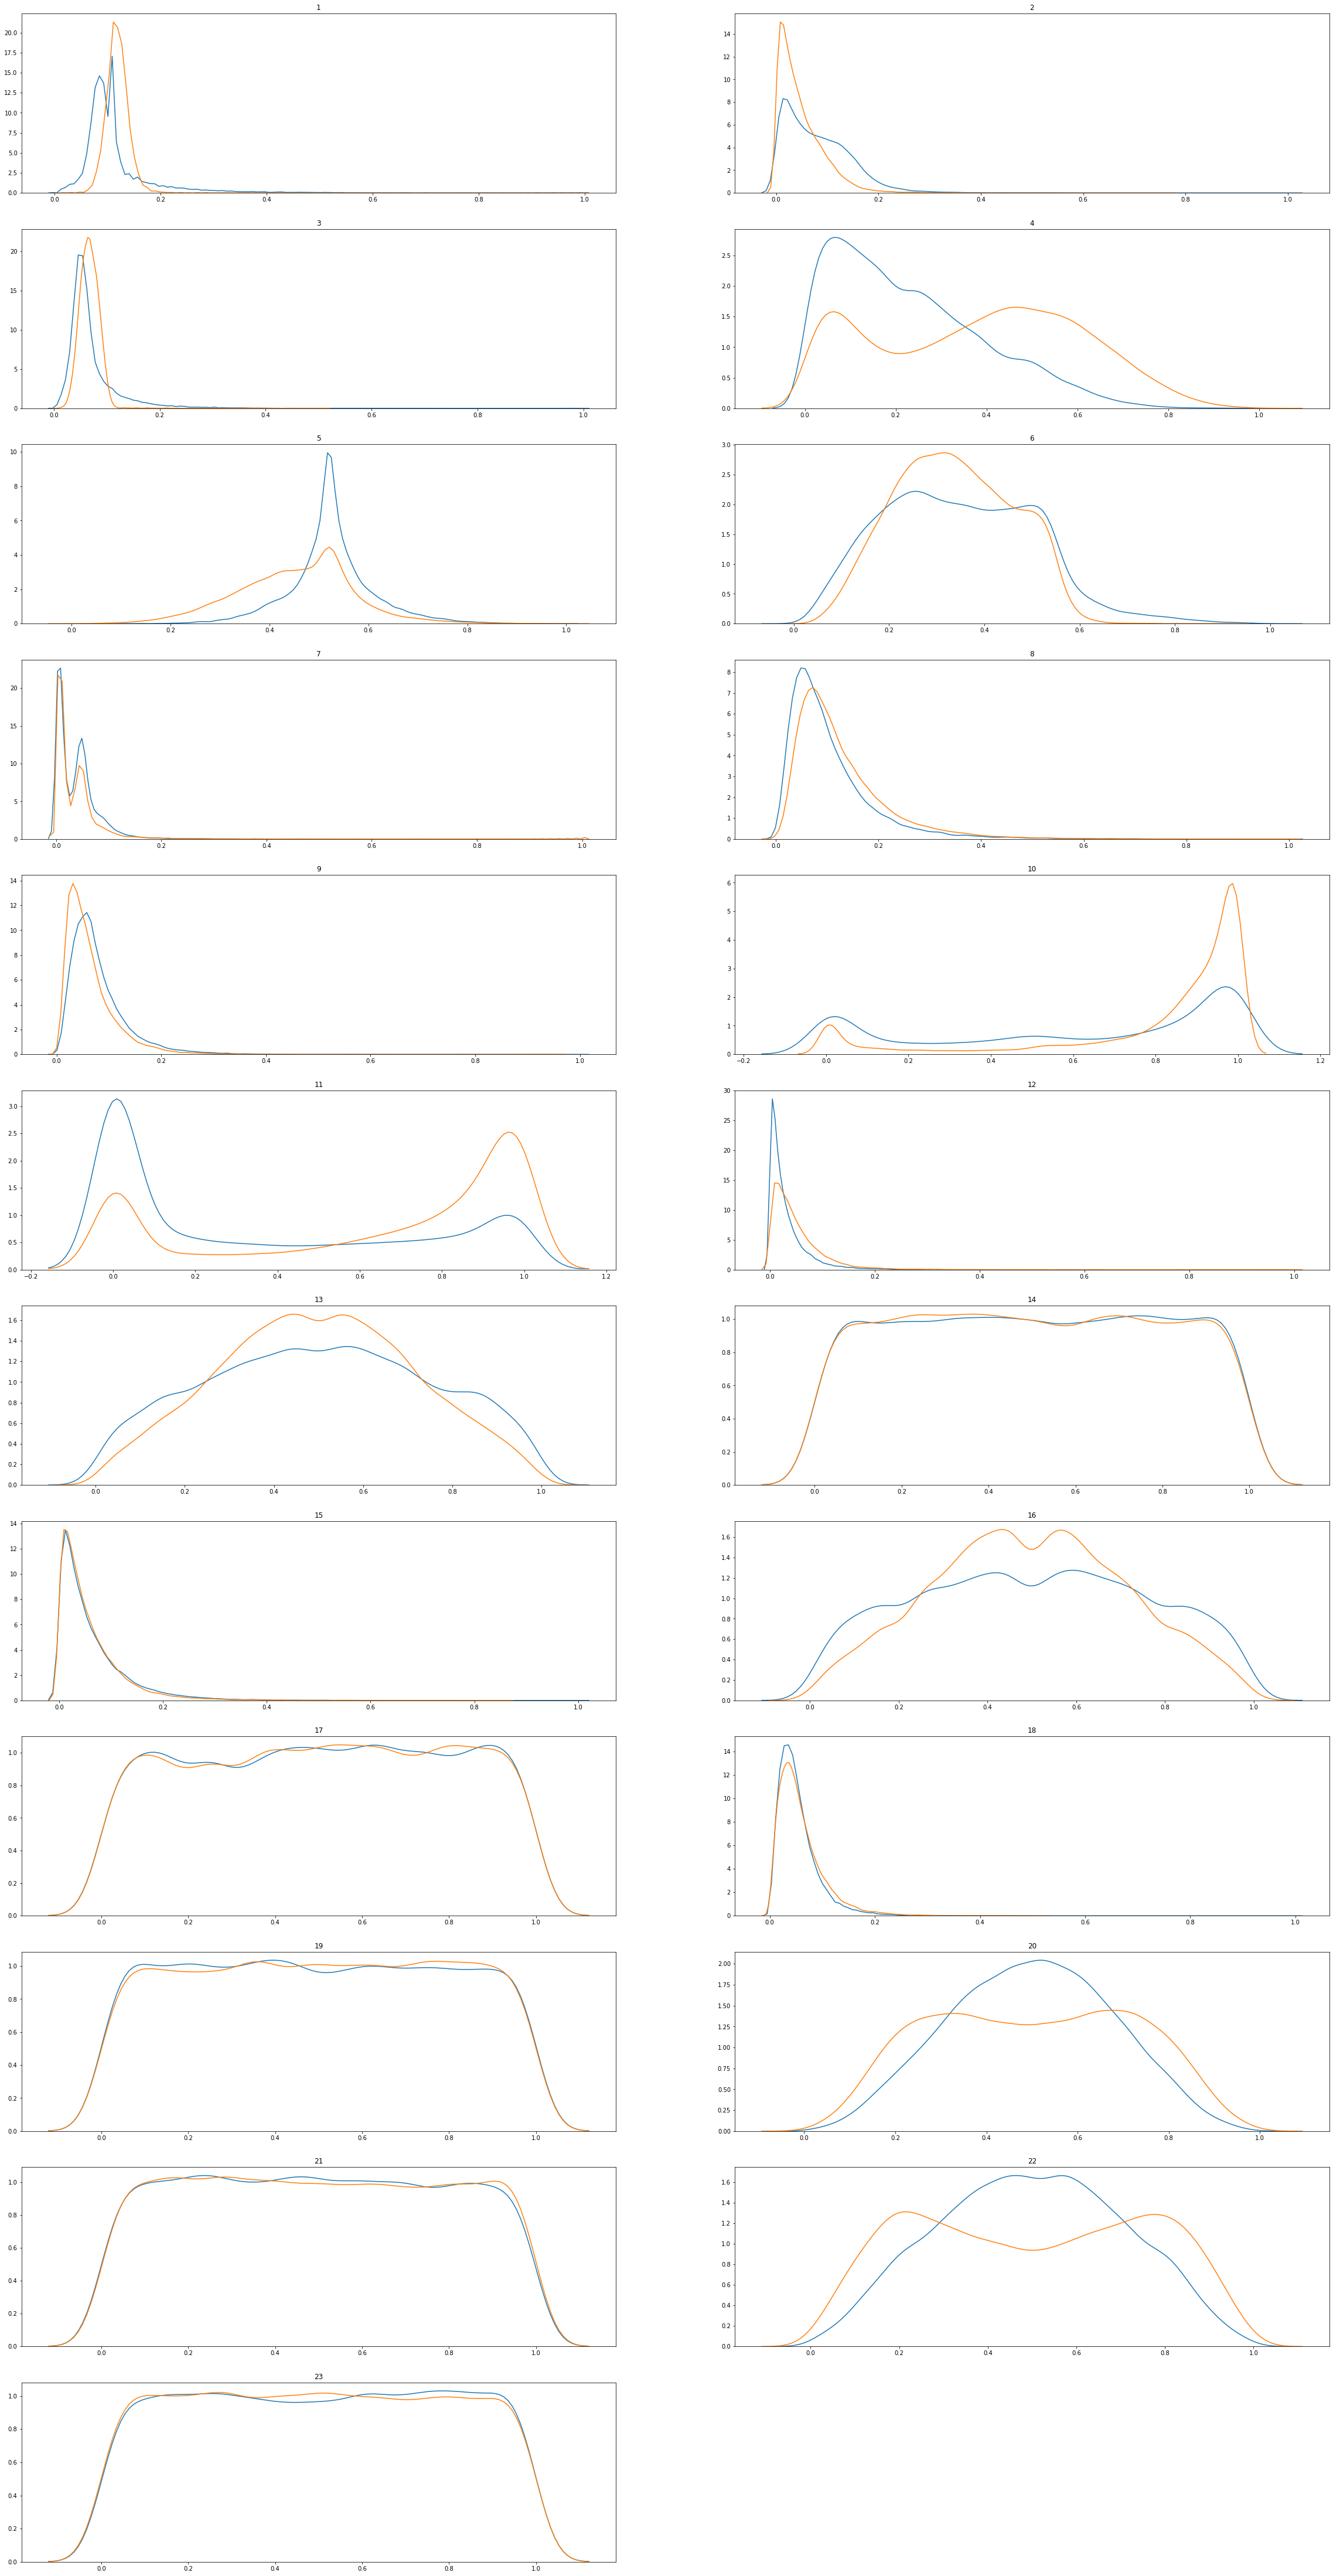

In [252]:
labels_dropped2=y[tX2_dropped_distribution[:,0].astype(int)]
tX2_label0=tX2_dropped_distribution[labels_dropped2==-1]
tX2_label1=tX2_dropped_distribution[labels_dropped2==1]

fig1=plt.figure(figsize=(40,80))
for i in range(1,tX2_label0.shape[1]):
    plt.subplot(12,2,i)
    plt.title(i)
    sns.distplot(tX2_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX2_label1[:,i],ax=plt.gca(),hist=False)

In [253]:
index_to_be_skewed2=[2,8,9,12,15,18]

tX2_skew_mins=np.apply_along_axis(np.min,0,tX2_dropped_distribution)
tX2_dropped_distribution[:,index_to_be_skewed2]= tX2_dropped_distribution[:,index_to_be_skewed2]+np.abs(tX2_skew_mins[index_to_be_skewed2])
tX2_dropped_distribution[:,index_to_be_skewed2]= np.log(tX2_dropped_distribution[:,index_to_be_skewed2]+1)

# Tx3 analysis

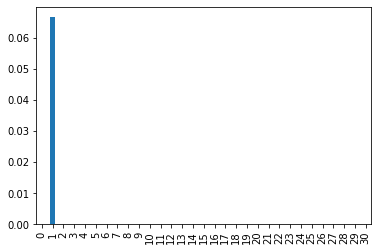

In [254]:
df=pd.DataFrame(tX3)
missing_series=df.isnull().sum()/df.shape[0]
missing_series.plot(kind="bar")

In [255]:
tX3_dropped=np.delete(tX3,[5,6,7,13,24,25,26,27,28,29],axis=1)

In [256]:
tX3[:,1:2], median3=nan_to_median(tX3[:,1:2])

In [257]:
labels_dropped1=y[tX3[:,0].astype(int)]
tX3_label0=tX3[labels_dropped1==-1]
tX3_label1=tX3[labels_dropped1==1]
print(len(tX3_label0))
print(len(tX3_label1))

15433
6731


In [258]:
np.random.seed(1)
np.random.shuffle(tX3_label0)
np.random.shuffle(tX3_label1)
tX3_label0=tX3_label0[:len(tX3_label1)]
tX3_dropped=np.concatenate((tX3_label0,tX3_label1),axis=0)
np.random.shuffle(tX3_dropped)
print(len(tX3_label0))
print(len(tX3_label1))

6731
6731


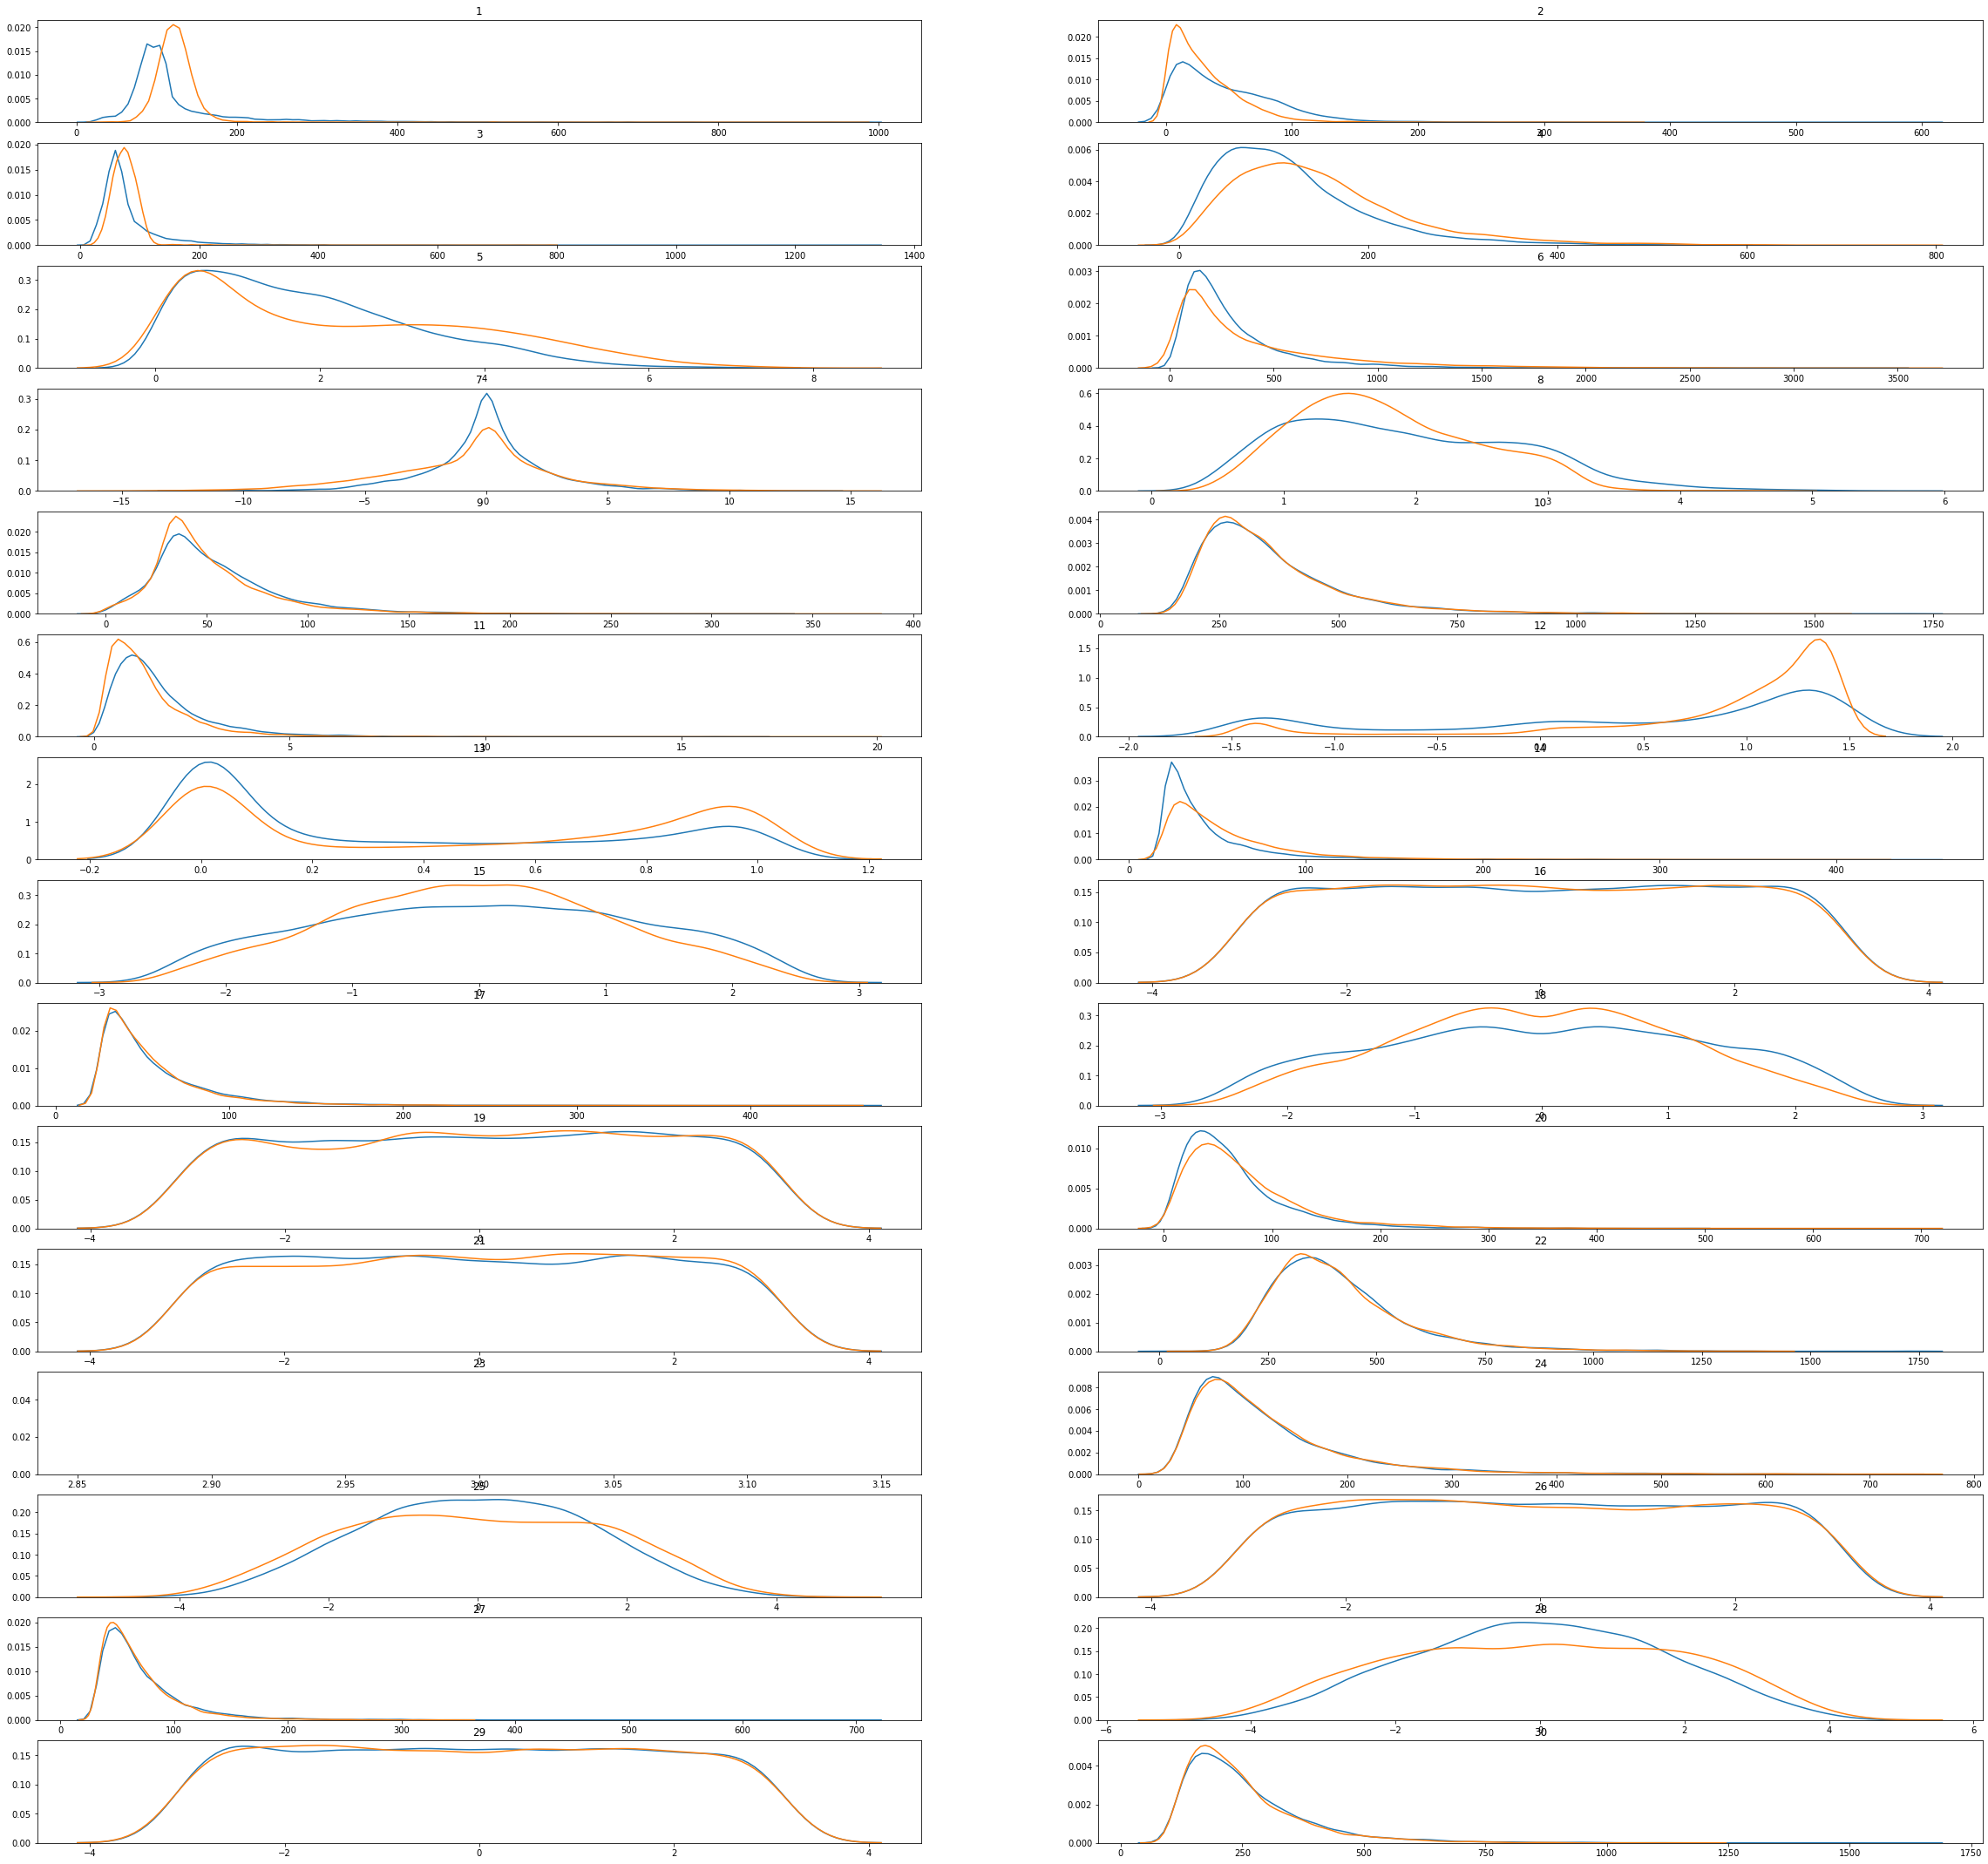

In [259]:
fig=plt.figure(figsize=(40,80))
for i in range(1,tX3_label0.shape[1]):
    plt.subplot(31,2,i)
    plt.title(i)
    sns.distplot( tX3_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot( tX3_label1[:,i],ax=plt.gca(),hist=False)

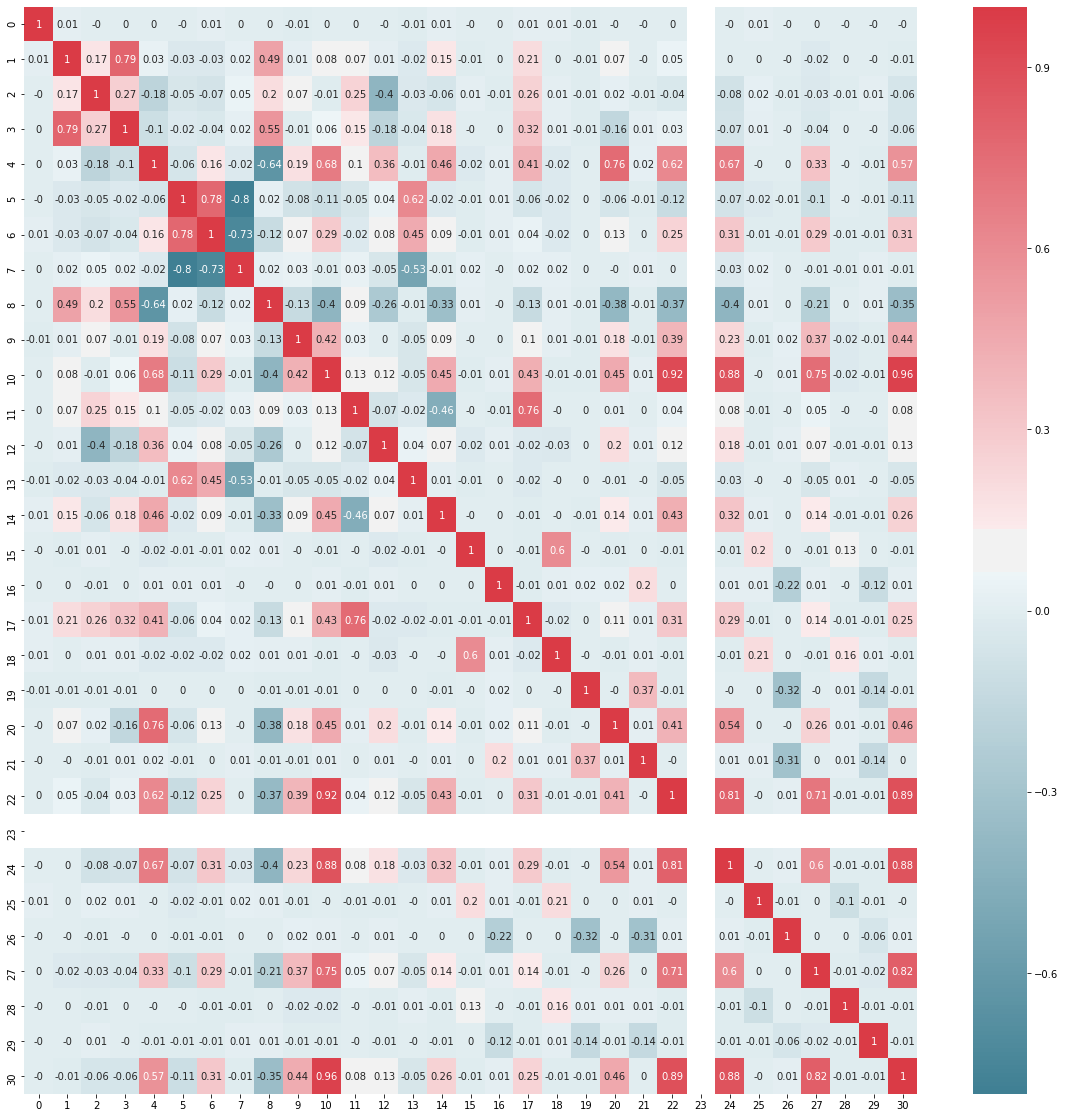

In [260]:
data=pd.DataFrame(tX3_dropped)
correlation_matrix=data.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(data=correlation_matrix.round(2),cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)

In [261]:
tX3_dropped_distribution=np.delete(tX3,[5,10,22,23,24,30],axis=1)

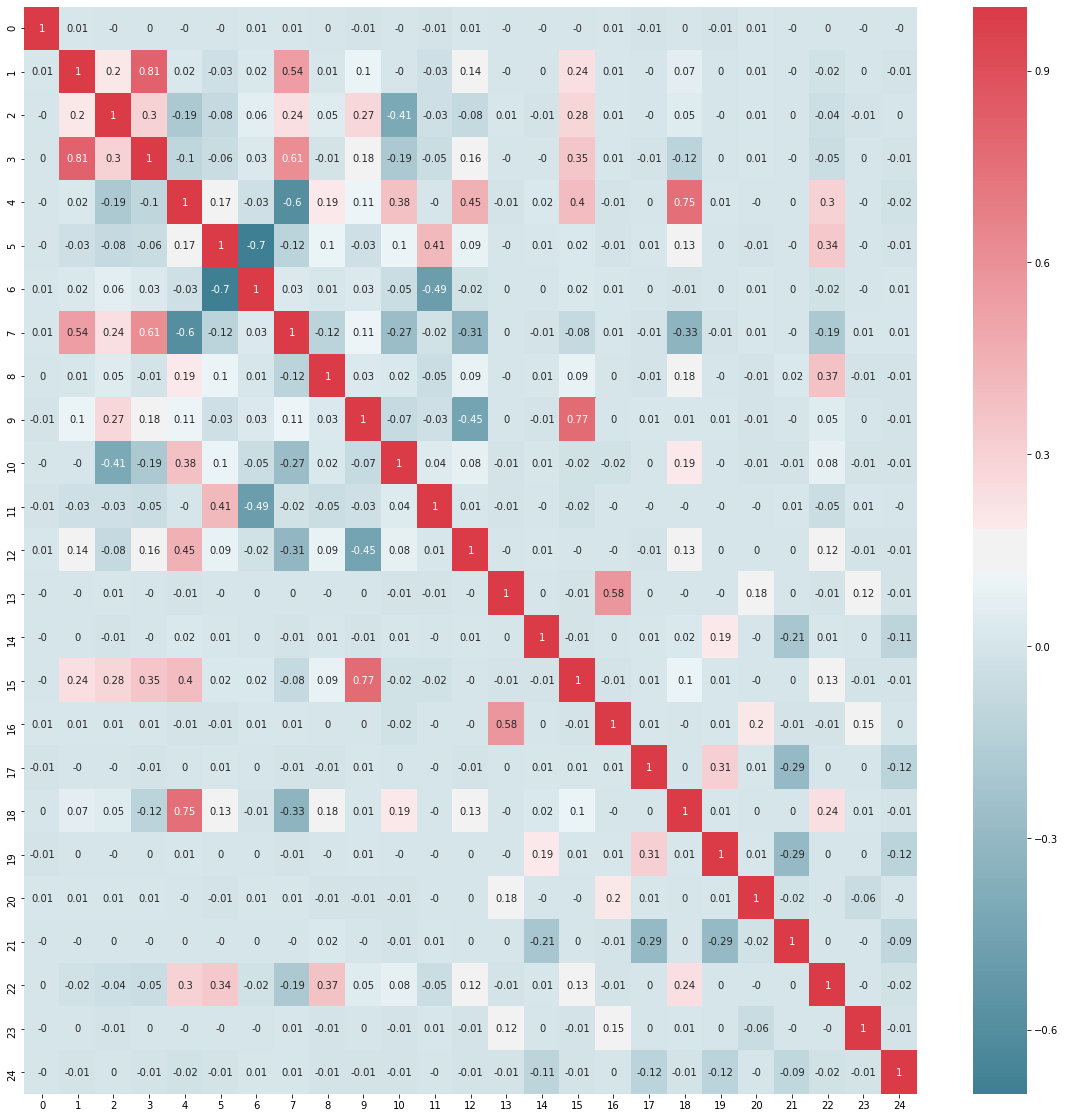

In [262]:
data=pd.DataFrame(tX3_dropped_distribution)
correlation_matrix=data.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(data=correlation_matrix.round(2),cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)

In [263]:
min3=np.min(tX3_dropped_distribution[:,1:],axis=0)
max3=np.max(tX3_dropped_distribution[:,1:],axis=0)
tX3_dropped_distribution[:,1:]=min_max_transform(tX3_dropped_distribution[:,1:],min3,max3)

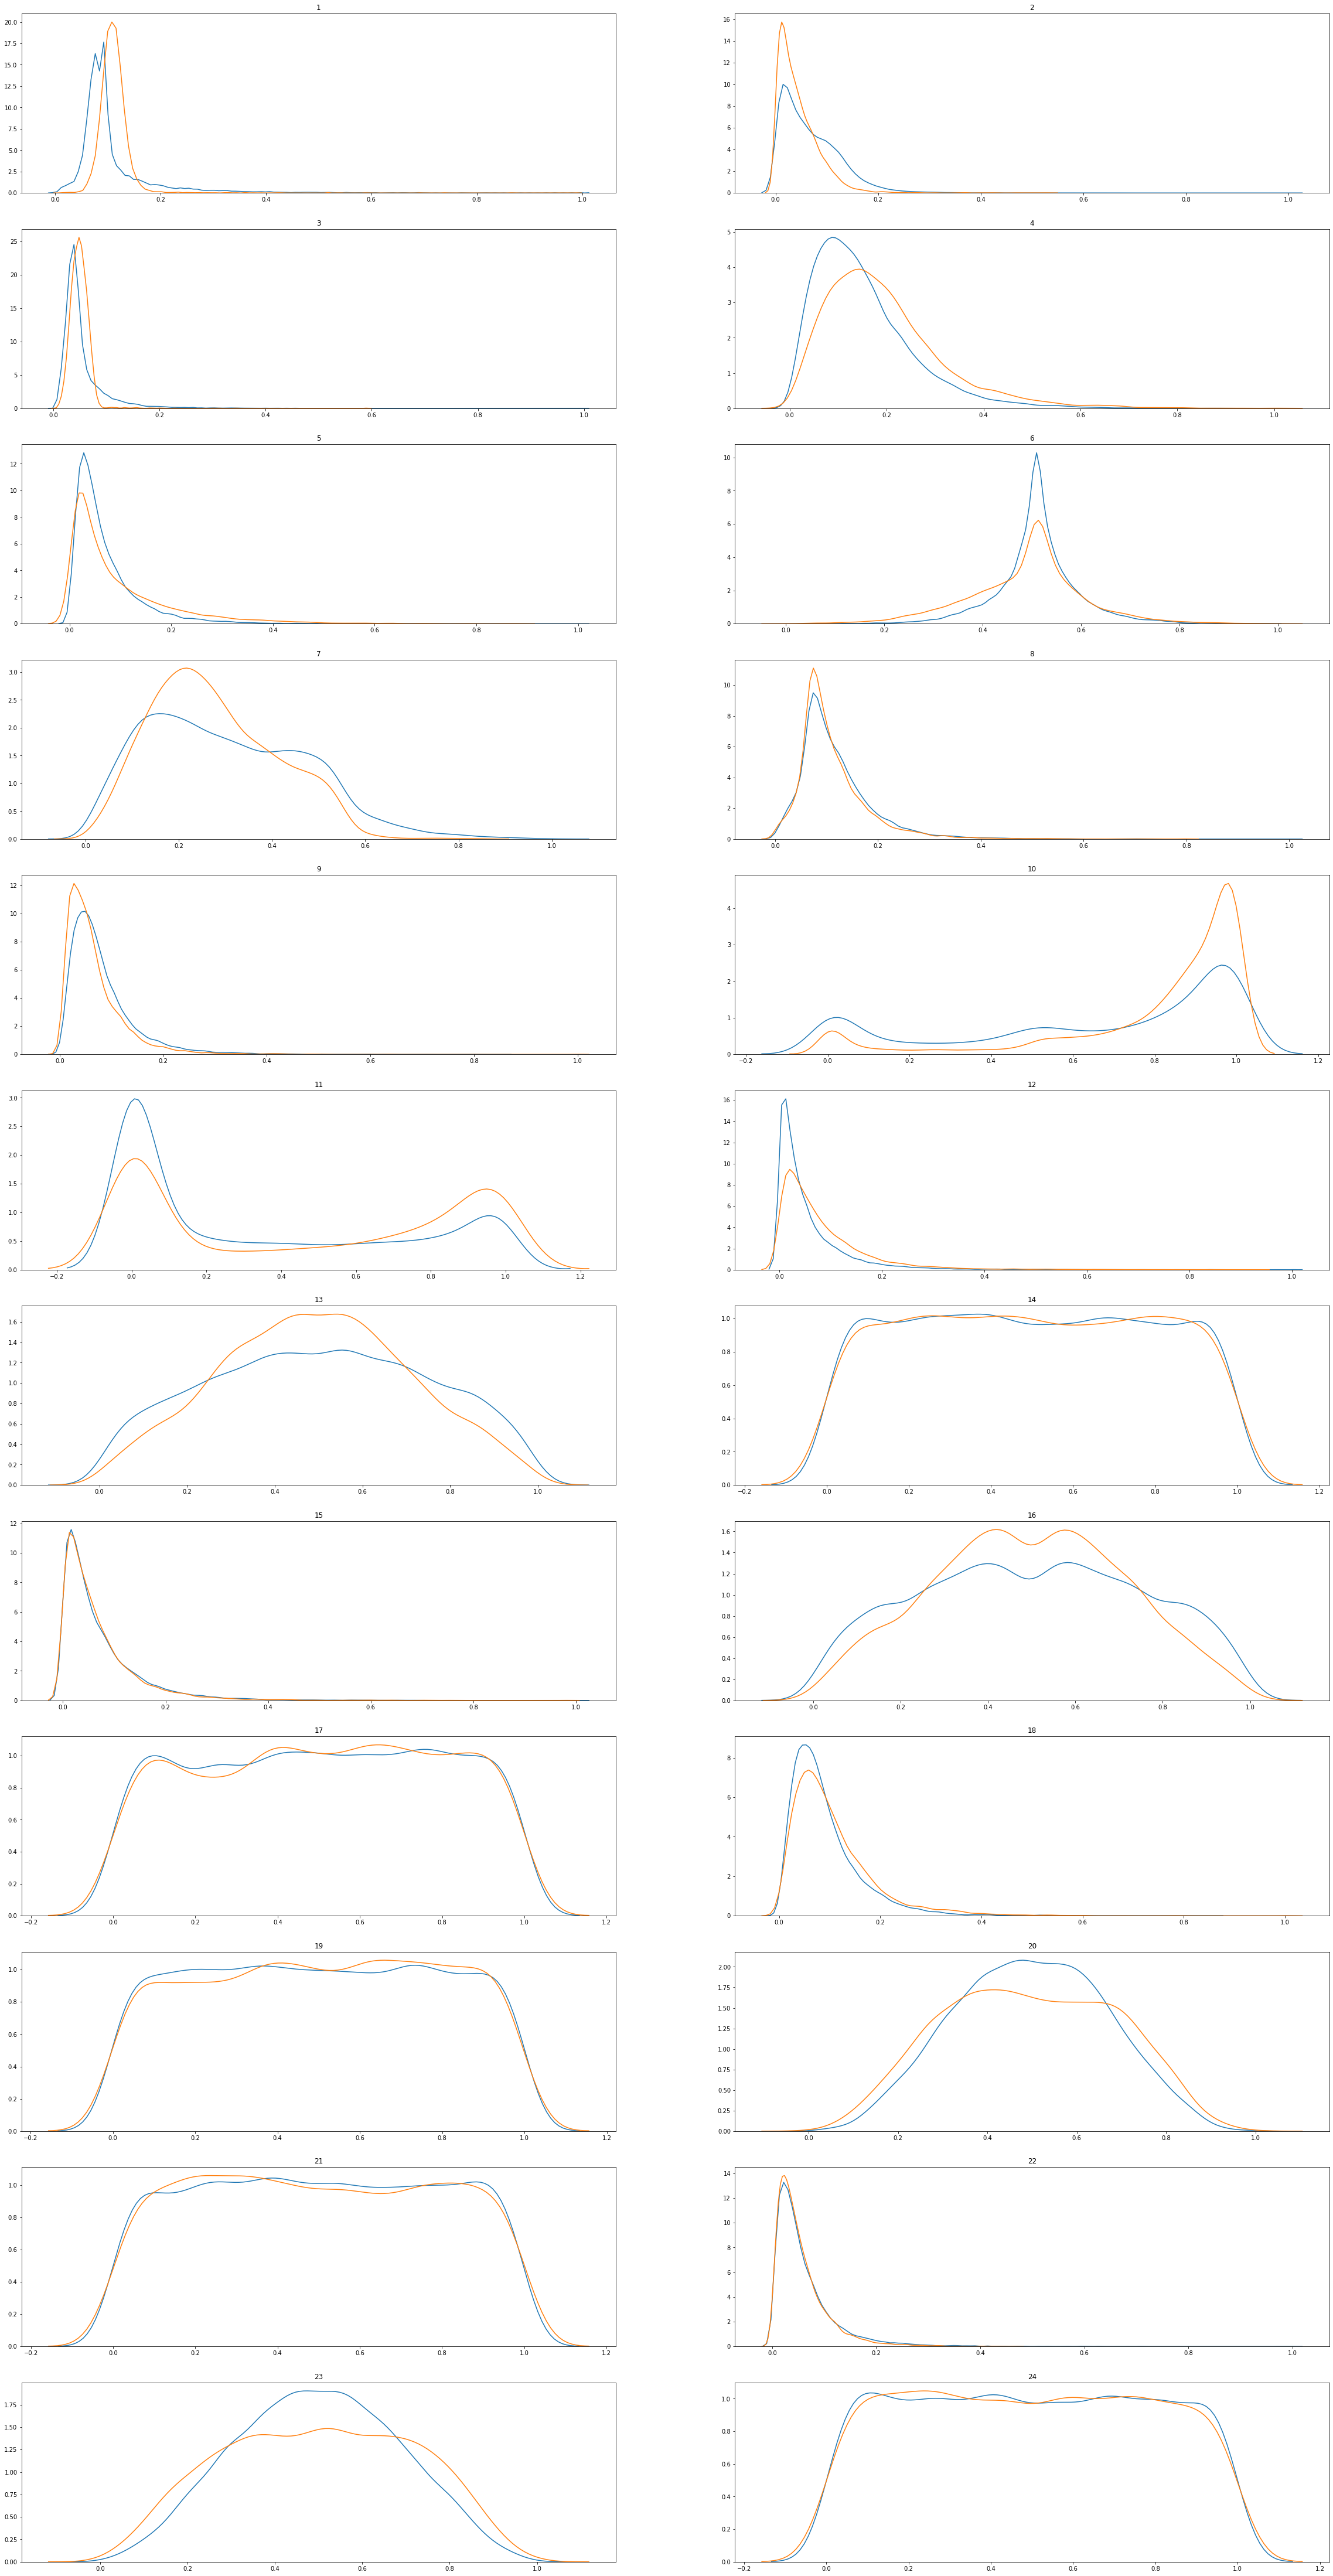

In [264]:
labels_dropped0=y[tX3_dropped_distribution[:,0].astype(int)]
tX3_label0=tX3_dropped_distribution[labels_dropped0==-1]
tX3_label1=tX3_dropped_distribution[labels_dropped0==1]

fig1=plt.figure(figsize=(40,80))
for i in range(1,tX3_label0.shape[1]):
    plt.subplot(12,2,i)
    plt.title(i)
    sns.distplot(tX3_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX3_label1[:,i],ax=plt.gca(),hist=False)

In [265]:
index_to_be_skewed3=[2,5,9,12]

tX3_skew_mins=np.apply_along_axis(np.min,0,tX3_dropped_distribution)
tX3_dropped_distribution[:,index_to_be_skewed3]= tX3_dropped_distribution[:,index_to_be_skewed3]+np.abs(tX3_skew_mins[index_to_be_skewed3])
tX3_dropped_distribution[:,index_to_be_skewed3]= np.log(tX3_dropped_distribution[:,index_to_be_skewed3]+1)

# Useful functions

In [266]:
def expand_and_normalize_X(X,d):
    """
    perform degree-d polynomial feature expansion of X, with bias but omitting interaction terms
    and normalize them.
    """

    expand = build_poly(X,d)
    expand_withoutBias,mu,std = normalize(expand[:,1:])
    expand[:,1:] = expand_withoutBias
    return expand, mu, std

In [267]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [268]:
def accuracy(y_true, y_pred):
    return np.sum(y_pred==y_true) / len(y_true)

# Least Squares

In [269]:
def cross_validation(y, x, k_indices,k, degree):
    """return the loss of ridge regression."""

    x_train = x[np.array([p for i in range(k_indices.shape[0]) if i != k for p in k_indices[i]])]
    y_train= y[np.array([p for i in range(k_indices.shape[0]) if i != k for p in k_indices[i]])]
    
    x_test=x[k_indices[k]]
    y_test=y[k_indices[k]]
  
    x_train_poly,mean_train,std_train= expand_and_normalize_X(x_train,degree)
    x_test_poly=build_poly(x_test,degree)
    x_test_poly[:,1:]=(x_test_poly[:,1:]-mean_train)/std_train
    
    w,loss=m.least_squares(y_train, x_train_poly)

    loss_tr= m.mse(y_train, x_train_poly, w)
    loss_te= m.mse(y_test, x_test_poly, w)
    return loss_tr, loss_te



In [270]:
from plots import cross_validation_visualization

def cross_validation_demo(y, x,min_,max_):
    seed = 1
    k_fold = 5
    degrees = np.arange(min_,max_)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    mse_tr = []
    mse_te = []
    min_loss=np.inf
    min_degree=0
    # ***************************************************
    for degree_ in degrees:
        print(degree_)
        loss_tr_degree=np.array([])
        loss_te_degree=np.array([])
        for k in range(k_fold):
            loss_tr_k, loss_te_k=cross_validation(y, x, k_indices, k, degree_)
            loss_tr_degree= np.append(loss_tr_degree,loss_tr_k)
            loss_te_degree= np.append(loss_te_degree,loss_te_k)
        mse_tr.append(loss_tr_degree.mean())
        mse_te.append(loss_te_degree.mean())
        if(loss_te_degree.mean()<min_loss):
            min_loss=loss_te_degree.mean()
            min_degree=degree_
    # ***************************************************    
    cross_validation_visualization(degrees, mse_tr, mse_te)   #wrong xlabel should be degree
    return min_degree,min_loss

1
2
3
4
5
6
7
8
9
10
11
12
13


(1, 0.3518873513491685, 0.3494643398778361)

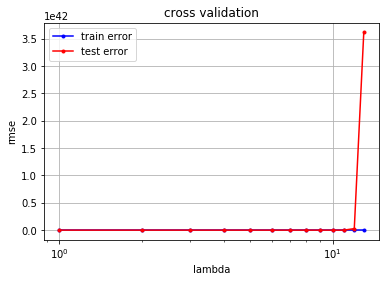

In [271]:
min_degree0,min_loss0=cross_validation_demo(y[tX0_dropped_distribution[:,0].astype(int)], tX0_dropped_distribution[:,1:],1,14)
tx0_norm,mean0,std0=expand_and_normalize_X(tX0_dropped_distribution[:,1:],min_degree0)
w0,loss0=m.least_squares(y[tX0_dropped_distribution[:,0].astype(int)],tx0_norm)
min_degree0,min_loss0,loss0

In [272]:
accuracy(y[tX0_dropped_distribution[:,0].astype(int)],predict_labels(w0,tx0_norm))

0.7724187980542916

1
2
3
4
5
6
7
8
9
10
11
12
13


(3, 0.3457229901395597, 0.3418082083546224)

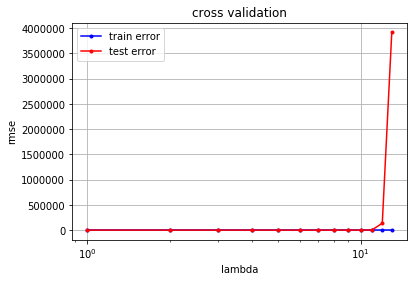

In [273]:
min_degree1,min_loss1=cross_validation_demo(y[tX1_dropped_distribution[:,0].astype(int)], tX1_dropped_distribution[:,1:],1,14)
tx1_norm,mean1,std1=expand_and_normalize_X(tX1_dropped_distribution[:,1:],min_degree1)
w1,loss1=m.least_squares(y[tX1_dropped_distribution[:,0].astype(int)],tx1_norm)
min_degree1,min_loss1,loss1

In [274]:
accuracy(y[tX1_dropped_distribution[:,0].astype(int)],predict_labels(w1,tx1_norm))

0.7546734031035727

1
2
3
4
5
6
7
8
9
10
11
12
13


(4, 0.30311693455508726, 0.29954388642209795)

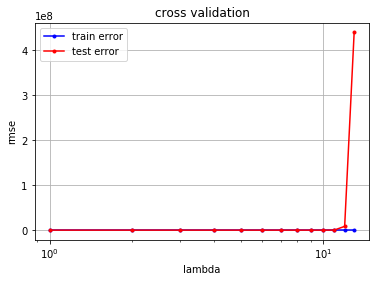

In [275]:
min_degree2,min_loss2=cross_validation_demo(y[tX2_dropped_distribution[:,0].astype(int)], tX2_dropped_distribution[:,1:],1,14)
tx2_norm,mean2,std2=expand_and_normalize_X(tX2_dropped_distribution[:,1:],min_degree2)
w2,loss2=m.least_squares(y[tX2_dropped_distribution[:,0].astype(int)],tx2_norm)
min_degree2,min_loss2,loss2

In [276]:
accuracy(y[tX2_dropped_distribution[:,0].astype(int)],predict_labels(w2,tx2_norm))

0.8041793467234734

1
2
3
4
5
6
7
8
9
10
11
12
13


(4, 0.30766975835398797, 0.3029339464428306)

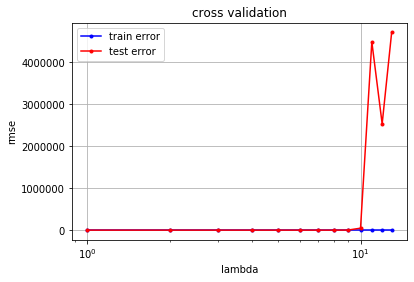

In [277]:
min_degree3,min_loss3=cross_validation_demo(y[tX3_dropped_distribution[:,0].astype(int)], tX3_dropped_distribution[:,1:],1,14)
tx3_norm,mean3,std3=expand_and_normalize_X(tX3_dropped_distribution[:,1:],min_degree3)
w3,loss3=m.least_squares(y[tX3_dropped_distribution[:,0].astype(int)],tx3_norm)
min_degree3,min_loss3,loss3

In [278]:
accuracy(y[tX3_dropped_distribution[:,0].astype(int)],predict_labels(w3,tx3_norm))

0.8028785417794622

In [279]:
# DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
DATA_TEST_PATH = '/Users/gerald/Workspaces/Machine Leaning/ML-Project-1-EPFL/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
# OUTPUT_PATH = '../data/result.csv' # TODO: fill in desired name of output file for submission
OUTPUT_PATH = '/Users/gerald/Workspaces/Machine Leaning/ML-Project-1-EPFL/result.csv'


x0=[]
x1=[]
x2=[]
x3=[]
y0indices=[]
y1indices=[]
y2indices=[]
y3indices=[]

for index, jet_num in enumerate(tX_test[:,22]):   
    if(int(jet_num)==0):
        x0.append(tX_test[index])
        y0indices.append(index)
    if(int(jet_num)==1):
        x1.append(tX_test[index])
        y1indices.append(index)
    if(int(jet_num)==2):
        x2.append(tX_test[index])
        y2indices.append(index)
    if(int(jet_num)==3):
        x3.append(tX_test[index])
        y3indices.append(index)
        
x0=np.array(x0)
x1=np.array(x1)
x2=np.array(x2)
x3=np.array(x3)

x0=np.delete(x0,[5,6,7,13,24,25,26,27,28,29]-np.ones(10),axis=1)
x0[:,0:1]=number_to_other_number(x0[:,0:1],median0)
###SHOULD WE DO nan_to_median here??
### Also, we take all the test set right(dont drop to have 50-50)?
x0=np.delete(x0,[3,4,7,13,19,20]-np.ones(6),axis=1)

x0=min_max_transform(x0,min0,max0)
#use previous skew_mins
index_to_be_skewed0=(index_to_be_skewed0-np.ones(len(index_to_be_skewed0))).astype(int)
x0[:,index_to_be_skewed0]= x0[:,index_to_be_skewed0]+np.abs(tX0_skew_mins[index_to_be_skewed0])
x0[:,index_to_be_skewed0]= np.log(x0[:,index_to_be_skewed0]+1)

x1=np.delete(x1,[5,6,7,13,27,28,29]-np.ones(7),axis=1)
x1[:,0:1]=number_to_other_number(x1[:,0:1],median1)
x1=np.delete(x1,[4,7,19,20]-np.ones(4),axis=1)

x1=min_max_transform(x1,min1,max1)
#use previous skew_mins
index_to_be_skewed1=(index_to_be_skewed1-np.ones(len(index_to_be_skewed1))).astype(int)
x1[:,index_to_be_skewed1]= x1[:,index_to_be_skewed1]+np.abs(tX1_skew_mins[index_to_be_skewed1])
x1[:,index_to_be_skewed1]= np.log(x1[:,index_to_be_skewed1]+1)


x2=np.delete(x2,[4,6,22,23,24,27,30]-np.ones(7),axis=1)
x2[:,0:1]=number_to_other_number(x2[:,0:1],median2)
x2=min_max_transform(x2,min2,max2)
#use previous skew_mins
index_to_be_skewed2=(index_to_be_skewed2-np.ones(len(index_to_be_skewed2))).astype(int)
x2[:,index_to_be_skewed2]= x2[:,index_to_be_skewed2]+np.abs(tX2_skew_mins[index_to_be_skewed2])
x2[:,index_to_be_skewed2]= np.log(x2[:,index_to_be_skewed2]+1)

x3=np.delete(x3,[5,10,22,23,24,30]-np.ones(6),axis=1)
x3[:,0:1]=number_to_other_number(x3[:,0:1],median3)
x3=min_max_transform(x3,min3,max3)
#use previous skew_mins
index_to_be_skewed3=(index_to_be_skewed3-np.ones(len(index_to_be_skewed3))).astype(int)
x3[:,index_to_be_skewed3]= x3[:,index_to_be_skewed3]+np.abs(tX3_skew_mins[index_to_be_skewed3])
x3[:,index_to_be_skewed3]= np.log(x3[:,index_to_be_skewed3]+1)

x0= build_poly(x0, min_degree0)
x0[:,1:]= (x0[:,1:]-mean0)/std0

x1= build_poly(x1, min_degree1)
x1[:,1:]= (x1[:,1:]-mean1)/std1

x2= build_poly(x2, min_degree2)
x2[:,1:]= (x2[:,1:]-mean2)/std2

x3= build_poly(x3, min_degree3)
x3[:,1:]= (x3[:,1:]-mean3)/std3

y0Predict=predict_labels(w0,x0)
y1Predict=predict_labels(w1,x1)
y2Predict=predict_labels(w2,x2)
y3Predict=predict_labels(w3,x3)

y_pred=np.empty(tX_test.shape[0])
y_pred[y0indices]=y0Predict
y_pred[y1indices]=y1Predict
y_pred[y2indices]=y2Predict
y_pred[y3indices]=y3Predict

create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the futur

# Ridge Regression

In [ ]:
def cross_validation_ridge(y, x, k_indices,k, degree,lambda_):
    """return the loss of ridge regression."""

    x_train = x[np.array([p for i in range(k_indices.shape[0]) if i != k for p in k_indices[i]])]
    y_train= y[np.array([p for i in range(k_indices.shape[0]) if i != k for p in k_indices[i]])]
    
    x_test=x[k_indices[k]]
    y_test=y[k_indices[k]]
  
    x_train_poly,mean_train,std_train= expand_and_normalize_X(x_train,degree)
    x_test_poly=build_poly(x_test,degree)
    x_test_poly[:,1:]=(x_test_poly[:,1:]-mean_train)/std_train
    
    w,loss=m.ridge_regression

    loss_tr= m.mse(y_train, x_train_poly, w)
    loss_te= m.mse(y_test, x_test_poly, w)
    return loss_tr, loss_te


In [ ]:
from plots import cross_validation_visualization
from build_polynomial import build_poly

def cross_validation_demo(y,x,min_,max_):
    seed = 1
    k_fold = 5
    lambdas = np.linspace(min_, max_, 30)
    max_degree = 12
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    min_loss=np.inf
    min_lambda=-1
    min_degree=0
    fig=plt.figure(figsize=(40,80))
    # ***************************************************
    for degree_ in range(1, max_degree + 1):
        print(degree_)
        # define lists to store the loss of training data and test data
        loss_tr = []
        loss_te = []
        for lambda_ in lambdas:
            loss_tr_tmp=[]
            loss_te_tmp=[]
            for k in range(k_fold):
                loss_tr_k, loss_te_k=cross_validation(y, x, k_indices, k, degree_, lambda_)
                loss_tr_tmp.append(loss_tr_k)
                loss_te_tmp.append(loss_te_k)   
            loss_tr_mean=np.sum(loss_tr_tmp)/len(loss_tr_tmp)
            loss_te_mean=np.sum(loss_te_tmp)/len(loss_te_tmp)
            loss_tr.append(loss_tr_mean)
            loss_te.append(loss_te_mean)
            if(loss_te_mean<min_loss):
                min_loss=loss_te_mean
                min_lambda=lambda_
                min_degree=degree_
        plt.subplot(max_degree,2,degree_)
        cross_validation_visualization(lambdas, loss_tr, loss_te)
        # ***************************************************    
    return min_lambda,min_degree,min_loss

In [ ]:
min_lambda0,min_degree0,min_loss0=cross_validation_demo(y[tX0_dropped_distribution[:,0].astype(int)], tX0_dropped_distribution[:,1:],0.001,1)
tx0_norm,mean0,std0=expand_and_normalize_X(tX0_dropped_distribution[:,1:],min_degree0)
w0,loss0=m.ridge_regression(y[tX0_dropped_distribution[:,0].astype(int)],tx0_norm,min_lambda0)
min_lambda0,min_degree0,min_loss0,loss0

In [ ]:
accuracy(y[tX0_dropped_distribution[:,0].astype(int)],predict_labels(w0,build_poly(tX0_dropped_distribution[:,1:],min_degree0)))

In [ ]:
min_lambda1,min_degree1,min_loss1=cross_validation_demo(y[tX1_dropped_distribution[:,0].astype(int)], tX1_dropped_distribution[:,1:],0.001,1)
tx1_norm,mean1,std1=expand_and_normalize_X(tX1_dropped_distribution[:,1:],min_degree1)
w1,loss1=m.ridge_regression(y[tX1_dropped_distribution[:,0].astype(int)],tx1_norm,min_lambda1)
min_lambda1min_degree1,min_loss1,loss1

In [ ]:
accuracy(y[tX1_dropped_distribution[:,0].astype(int)],predict_labels(w1,build_poly(tX1_dropped_distribution[:,1:],min_degree1)))

In [ ]:
min_lambda2,min_degree2,min_loss2=cross_validation_demo(y[tX2_dropped_distribution[:,0].astype(int)], tX2_dropped_distribution[:,1:],0.001,1)
tx2_norm,mean2,std2=expand_and_normalize_X(tX2_dropped_distribution[:,1:],min_degree2)
w2,loss2=m.ridge_regression(y[tX2_dropped_distribution[:,0].astype(int)],tx2_norm,min_lambda2)
min_lambda2,min_degree2,min_loss2,loss2

In [ ]:
accuracy(y[tX2_dropped_distribution[:,0].astype(int)],predict_labels(w2,build_poly(tX2_dropped_distribution[:,1:],min_degree2)))

In [ ]:
min_lambda3,min_degree3,min_loss3=cross_validation_demo(y[tX3_dropped_distribution[:,0].astype(int)], tX3_dropped_distribution[:,1:],0.001,1)
tx3_norm,mean3,std3=expand_and_normalize_X(tX3_dropped_distribution[:,1:],min_degree3)
w3,loss3=m.ridge_regression(y[tX3_dropped_distribution[:,0].astype(int)],tx3_norm,min_lambda3)
min_lambda3,min_degree3,min_loss3,loss3

In [ ]:
accuracy(y[tX3_dropped_distribution[:,0].astype(int)],predict_labels(w3,build_poly(tX3_dropped_distribution[:,1:],min_degree3)))

In [ ]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
OUTPUT_PATH = '../data/result_ridge.csv' # TODO: fill in desired name of output file for submission

x0=[]
x1=[]
x2=[]
x3=[]
y0indices=[]
y1indices=[]
y2indices=[]
y3indices=[]

for index, jet_num in enumerate(tX_test[:,22]):   
    if(int(jet_num)==0):
        x0.append(tX_test[index])
        y0indices.append(index)
    if(int(jet_num)==1):
        x1.append(tX_test[index])
        y1indices.append(index)
    if(int(jet_num)==2):
        x2.append(tX_test[index])
        y2indices.append(index)
    if(int(jet_num)==3):
        x3.append(tX_test[index])
        y3indices.append(index)
        
x0=np.array(x0)
x1=np.array(x1)
x2=np.array(x2)
x3=np.array(x3)

x0=np.delete(x0,[5,6,7,13,24,25,26,27,28,29]-np.ones(10),axis=1)
x0=np.delete(x0,[4,12,19,20]-np.ones(4),axis=1)
x1=np.delete(x1,[5,6,7,13,27,28,29]-np.ones(7),axis=1)
x1=np.delete(x1,[12,15,17,19,20]-np.ones(5),axis=1)
x2=np.delete(x2,[16,19,21,23,29,30]-np.ones(6),axis=1)
x3=np.delete(x3,[16,19,21,23,26]-np.ones(5),axis=1)

x0= build_poly(x0, min_degree0)
x0[:,1:]= (x0[:,1:]-mean0)/std0

x1= build_poly(x1, min_degree1)
x1[:,1:]= (x1[:,1:]-mean1)/std1

x2= build_poly(x2, min_degree2)
x2[:,1:]= (x2[:,1:]-mean2)/std2

x3= build_poly(x3, min_degree3)
x3[:,1:]= (x3[:,1:]-mean3)/std3

y0Predict=predict_labels(w0,x0)
y1Predict=predict_labels(w1,x1)
y2Predict=predict_labels(w2,x2)
y3Predict=predict_labels(w3,x3)

y_pred=np.empty(tX_test.shape[0])
y_pred[y0indices]=y0Predict
y_pred[y1indices]=y1Predict
y_pred[y2indices]=y2Predict
y_pred[y3indices]=y3Predict

create_csv_submission(ids_test, y_pred, OUTPUT_PATH)